* * * * * * * * * * *
Master notebook to run every step of the analyses of the Z0 experiment in python.

Author: Rodrigo Guedes Lang (rodrigo.lang@fau.de)

Date: March 2024

Based on scripts by Kathrin Valerius and Jannik Hofestaedt from 2011-2013
* * * * * * * * * * *

In [363]:
from glob import glob
from natsort import natsorted
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [364]:
from PIL import Image
from IPython.display import display

import ipywidgets as widgets
from ipywidgets import interact

import random

In [365]:
def browse_images(channel):
    images = natsorted(glob(f'../Data/GROPEScreenshots/{channel}/*.png'))
    def view_image(i):
        display(Image.open(images[i]))
    interact(view_image, i=(0,len(images)-1))

def pick_images():
    n = random.sample(range(0,40), k=10)
    images = natsorted(glob(f'../Data/GROPEScreenshots/test/*.png'))
    def view_image(i):
        display(Image.open(images[i]))
    interact(view_image, i=n)
    print(n)

# Part 1 - Qualitative analysis of events

In this part of the experiment, the main idea is to look at a small subset of Monte Carlo (MC) events to build up insight on how events from each channel look like on average. The final good is to come up with some crude cuts to separate the channels.

## Part 1.1 - GROPE event display

### Exercises

- 1.1. For each channel, describe qualitatively the features of its events.

- 1.2. Come up with a 4x4 table describing which variables are important for separating each pair of channels

In [366]:
browse_images("ee")

interactive(children=(IntSlider(value=9, description='i', max=19), Output()), _dom_classes=('widget-interact',…

- 1.3. Now, for 10 randomly selected images, just by looking at the GROPE image, try to evaluate what channel each event originates from (ee, mm, tt or qq).

In [367]:
pick_images()

interactive(children=(Dropdown(description='i', options=(35, 14, 28, 39, 25, 9, 21, 5, 32, 1), value=35), Outp…

[35, 14, 28, 39, 25, 9, 21, 5, 32, 1]


In [368]:
solution = ["3: mm", "23: qq", "17: ee", "18: mm", "21: qq", "38: tt", "39: ee", "12: qq", "2: ee", "11: tt"]

# Part 2 - Quantitative analysis of events

Looking at singular events may help understanding how they look like in the detector. Nevertheless, due to the stochastic nature of the processes involved, each event will look quite differently and we need to look at event distributions.

In the previous part, we have dealt with very few MC events to create a better insight on what their properties and differences are. In this part, we will move on to a much larger set of MC events so that more complete and well-described distributions can be analysed. From here on, information and images of single events will not be used anymore.

## Part 2.1 - Generating histograms

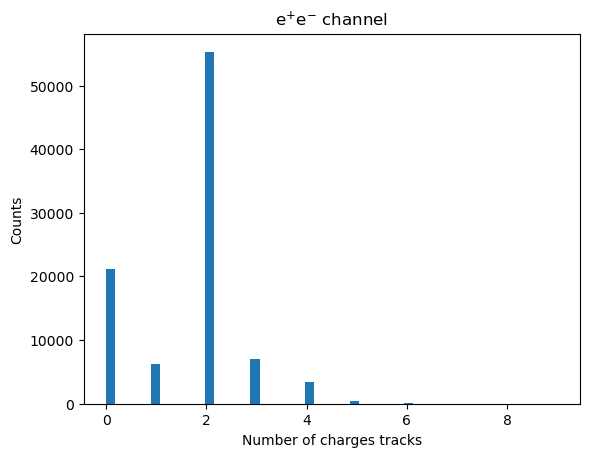

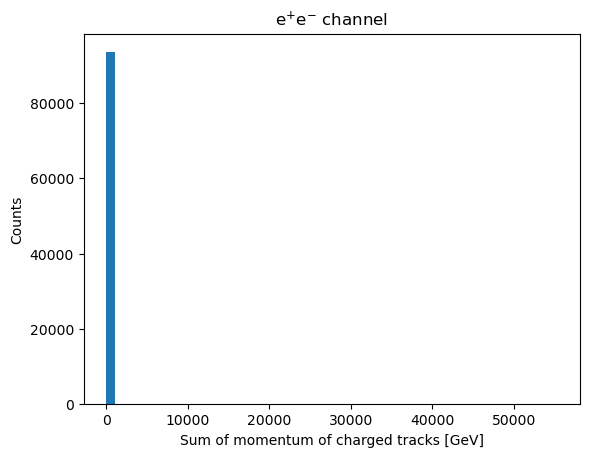

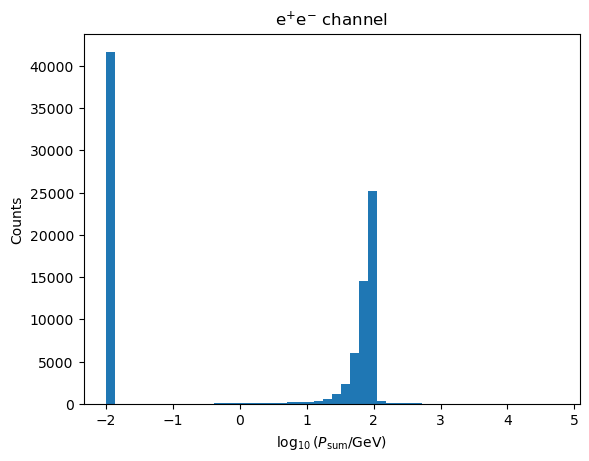

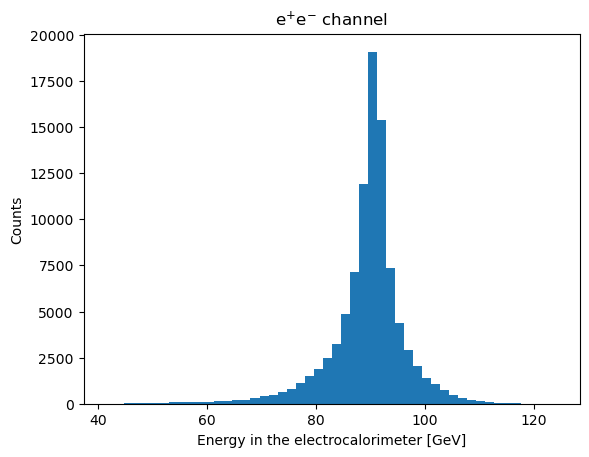

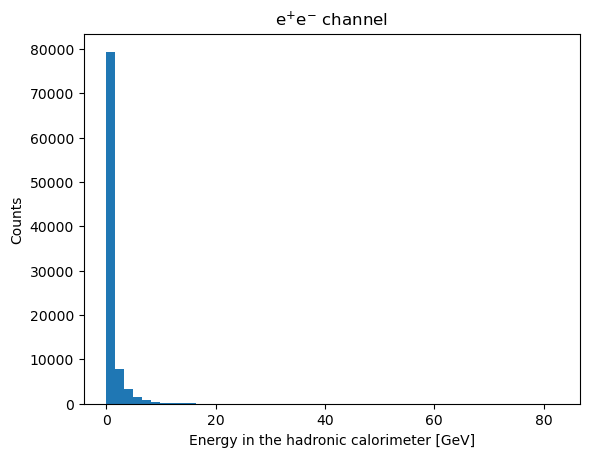

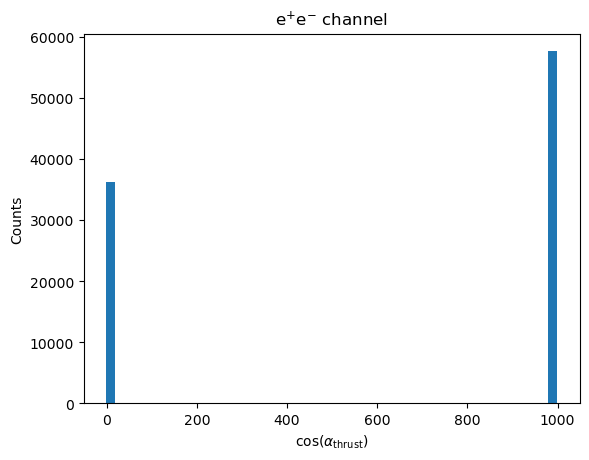

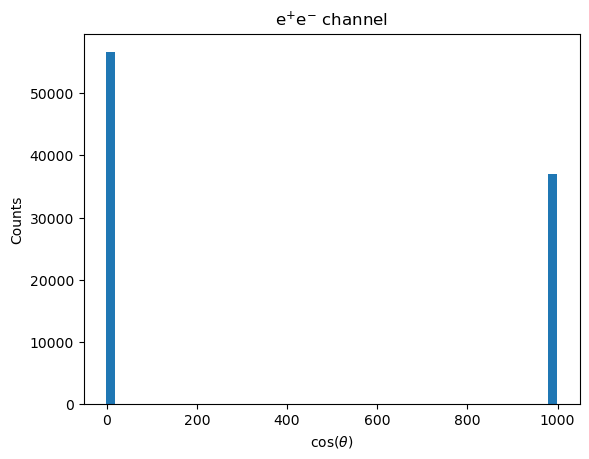

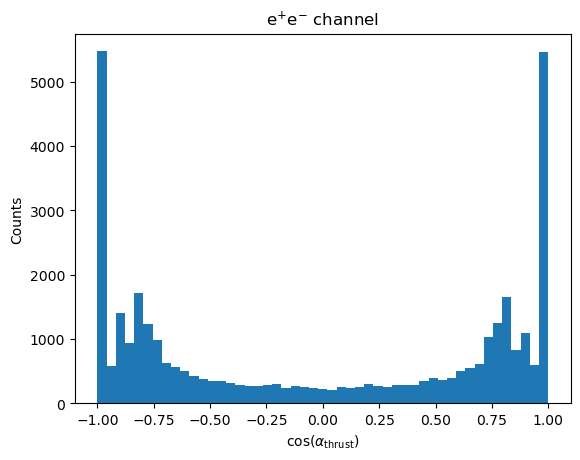

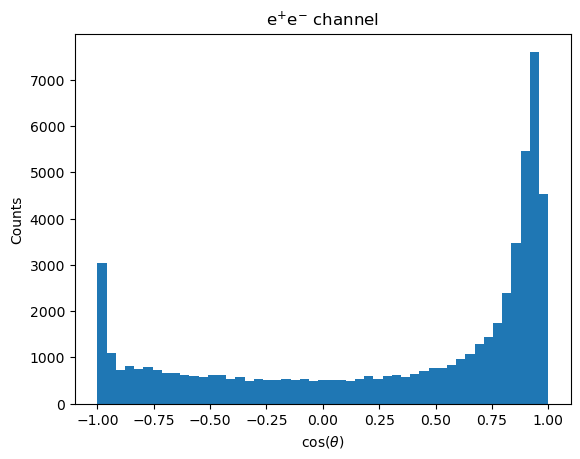

In [369]:
# ee channel
file = uproot.open("../Data/MC/ee.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())


plt.hist(Ncharged,bins=50)
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures

plt.hist(Pcharged,bins=50)
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(np.log10(Pcharged+0.01),bins=50)
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(E_ecal,bins=50)
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(E_hcal,bins=50)
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(cos_thru,bins=50)
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(cos_thet,bins=50)
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(cos_thru,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

plt.hist(cos_thet,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.show()

### Questions

Three plots were "redefined".

1. For $P_{\rm{sum}}$, we used log10 (and had to add 0.01). Why? Because log(0) is not defined.
2. For the angles, we need to constrain to the physical values, i.e., $-1 < \cos(\theta) < 1$. What happened to the events with unphysical angles? In the second plot one cuts out only the physical angles and dismiss the remaining ones.

### Exercises

2.1.0. Every plot in this protocol/example notebook has been plotted with the standard style options. Are these the best options in general? For each case? Do you think you can come up with better looking/easier to read plots?

2.1.1. Obtain the same histogram for the other three channels (the input root files are located in the same folder).

2.1.2. Come up with a nice way to show the comparison between the four channels

In [370]:
#Solution 2.1.0:
#One should specify the range of the Psum plot, otherwise there is only a large peak at 0 and nothing else, so basically it conveys no information

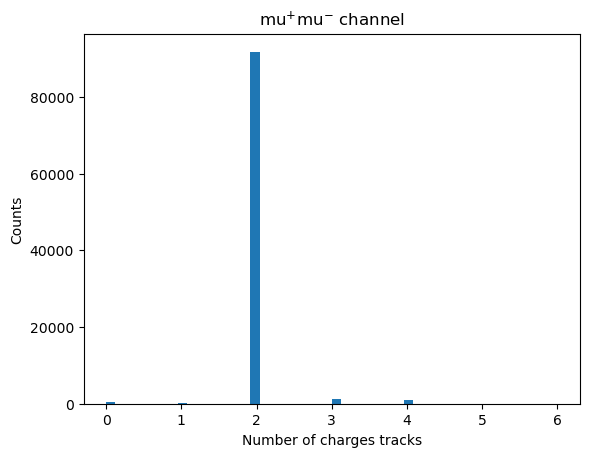

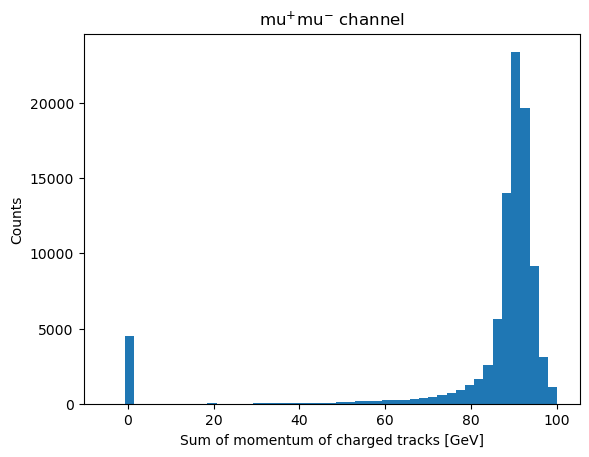

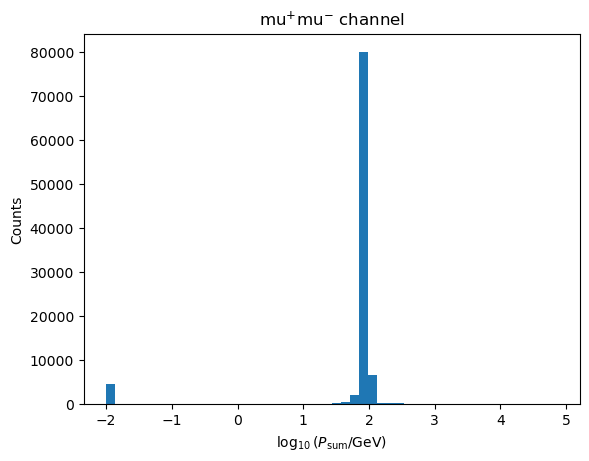

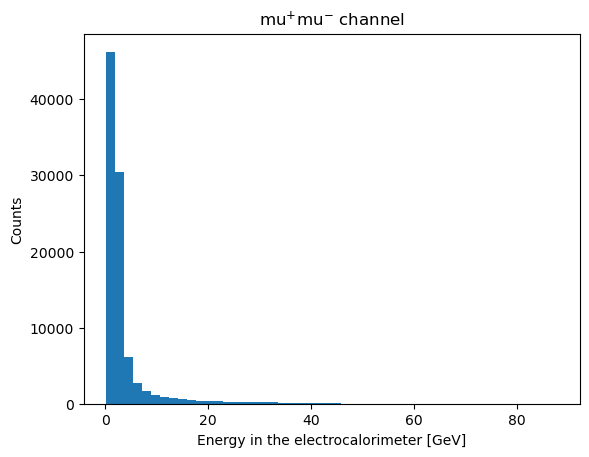

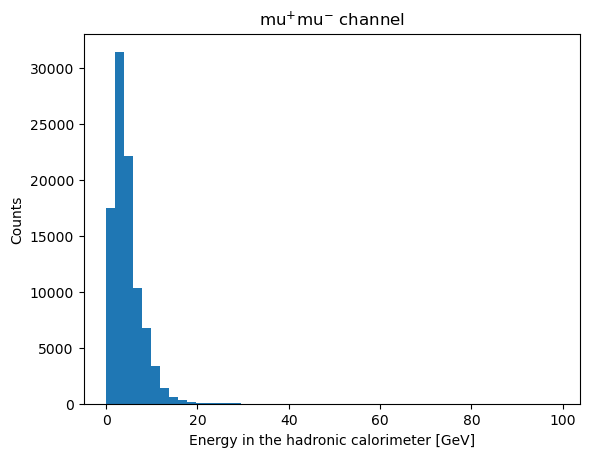

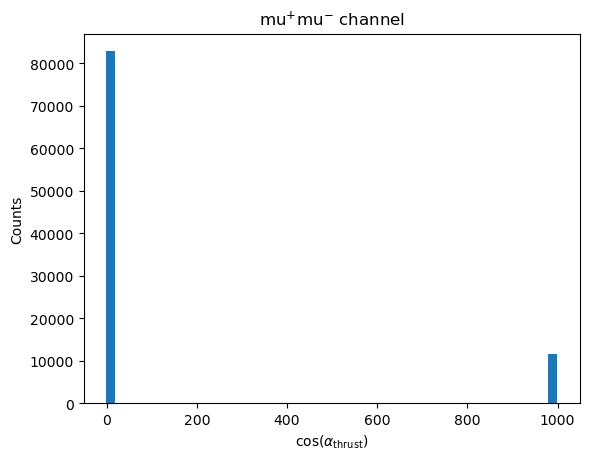

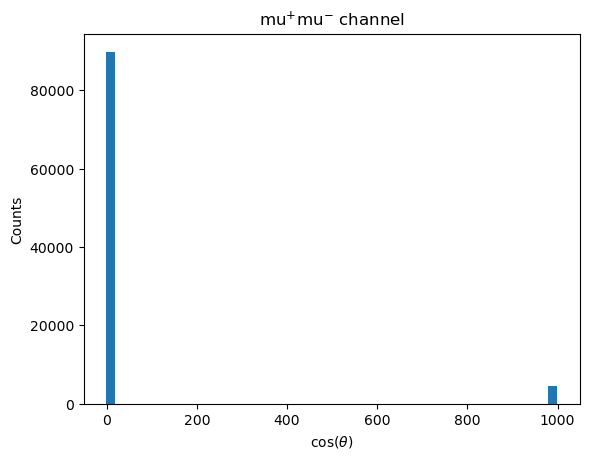

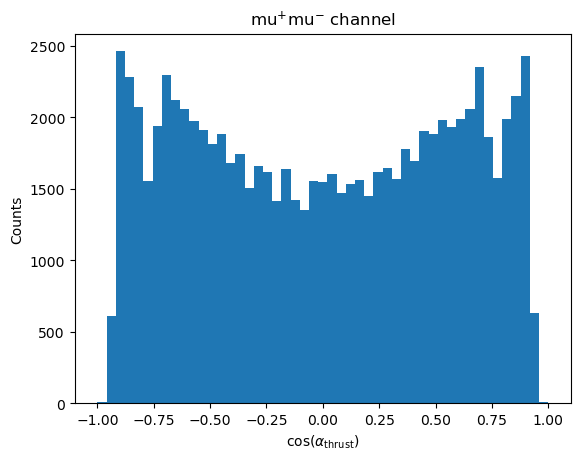

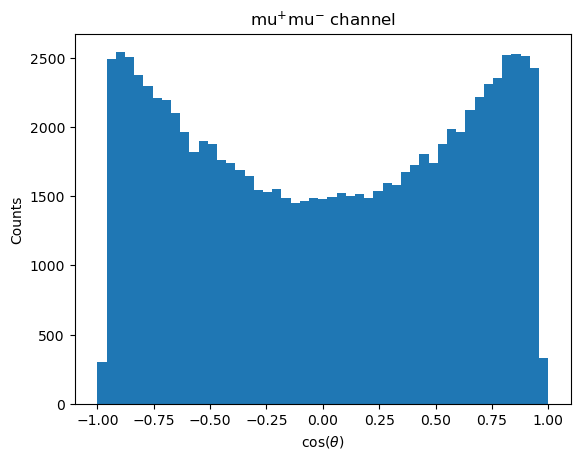

In [371]:
#Solution 2.1.1, mm-channel

file = uproot.open("../Data/MC/mm.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())


plt.hist(Ncharged,bins=50)
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{mu^{+}mu^{-}}$ channel")
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures

plt.hist(Pcharged,bins=np.linspace(-5,100,50))
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{mu^{+}mu^{-}}$ channel")
plt.show()

plt.hist(np.log10(Pcharged+0.01),bins=50)
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{mu^{+}mu^{-}}$ channel")
plt.show()

plt.hist(E_ecal,bins=50)
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{mu^{+}mu^{-}}$ channel")
plt.show()

plt.hist(E_hcal,bins=50)
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{mu^{+}mu^{-}}$ channel")
plt.show()

plt.hist(cos_thru,bins=50)
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{mu^{+}mu^{-}}$ channel")
plt.show()

plt.hist(cos_thet,bins=50)
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{mu^{+}mu^{-}}$ channel")
plt.show()

plt.hist(cos_thru,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{mu^{+}mu^{-}}$ channel")
plt.show()

plt.hist(cos_thet,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{mu^{+}mu^{-}}$ channel")
plt.show()

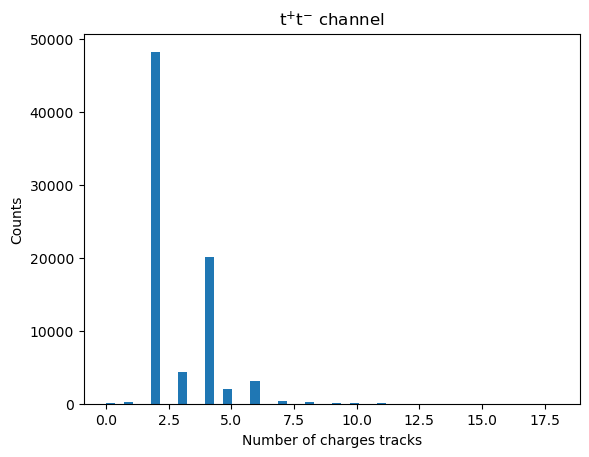

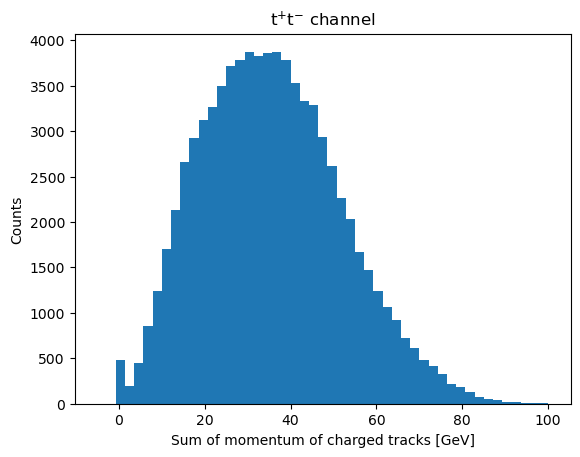

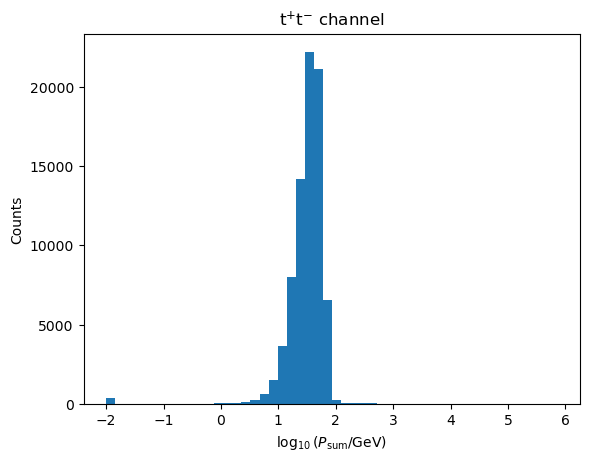

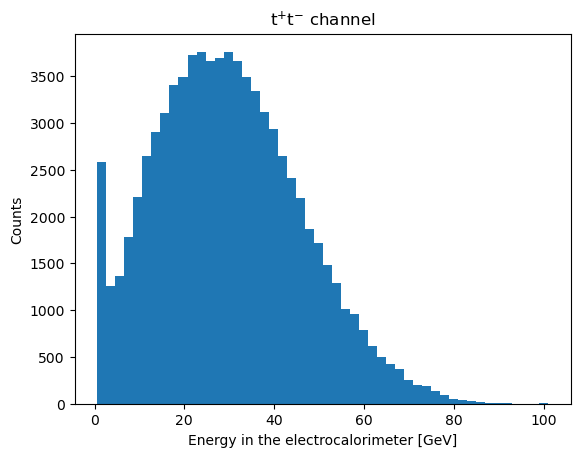

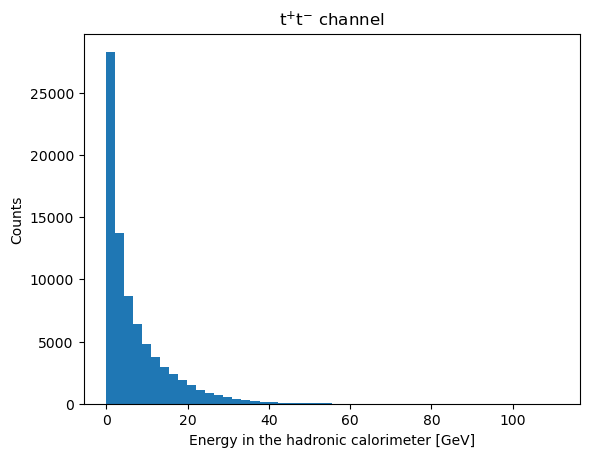

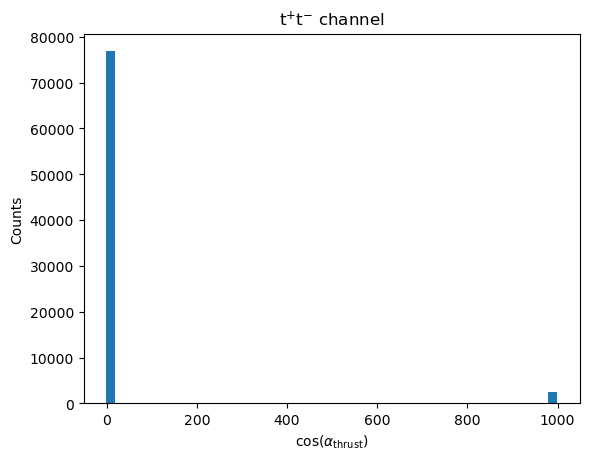

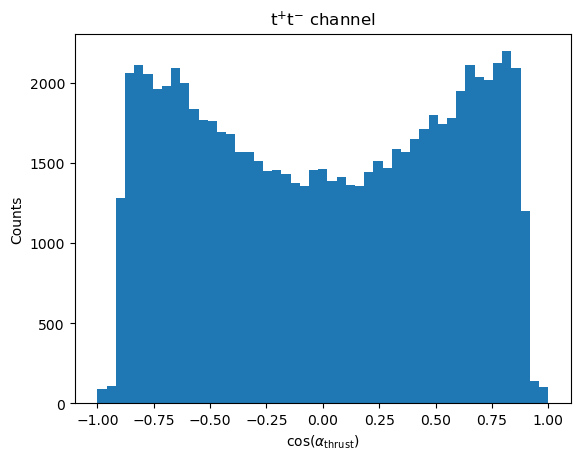

In [372]:
#Solution 2.1.1 tt-channel
#Here we do not plot the histogram for the theta angle, because according to the preparation file this anlge is only meaningful in the case of the ee- and the mm-channel. 
file = uproot.open("../Data/MC/tt.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())


plt.hist(Ncharged,bins=50)
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures

plt.hist(Pcharged,bins=np.linspace(-5,100,50))
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

plt.hist(np.log10(Pcharged+0.01),bins=50)
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

plt.hist(E_ecal,bins=50)
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

plt.hist(E_hcal,bins=50)
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

plt.hist(cos_thru,bins=50)
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

# plt.hist(cos_thet,bins=50)
# plt.xlabel(r"$\cos(\theta)$")
# plt.ylabel("Counts")
# plt.title(r"$\rm{t^{+}t^{-}}$ channel")
# plt.show()

plt.hist(cos_thru,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{t^{+}t^{-}}$ channel")
plt.show()

# plt.hist(cos_thet,bins=np.linspace(-1,1,50))
# plt.xlabel(r"$\cos(\theta)$")
# plt.ylabel("Counts")
# plt.title(r"$\rm{t^{+}t^{-}}$ channel")
# plt.show()

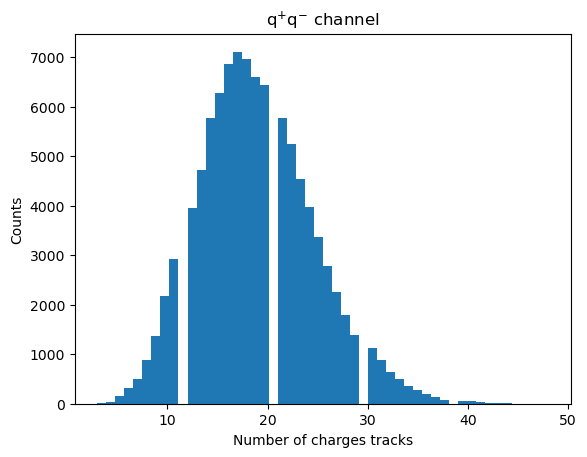

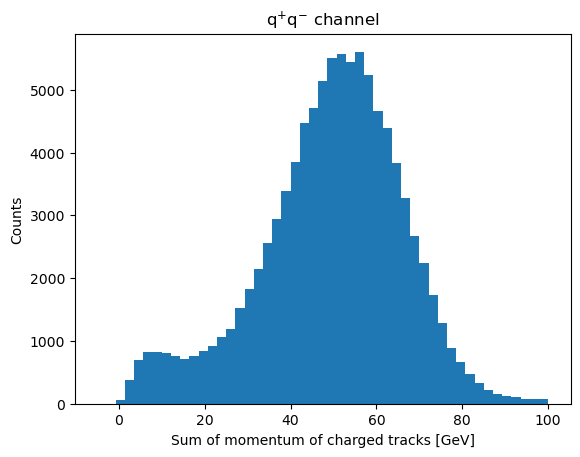

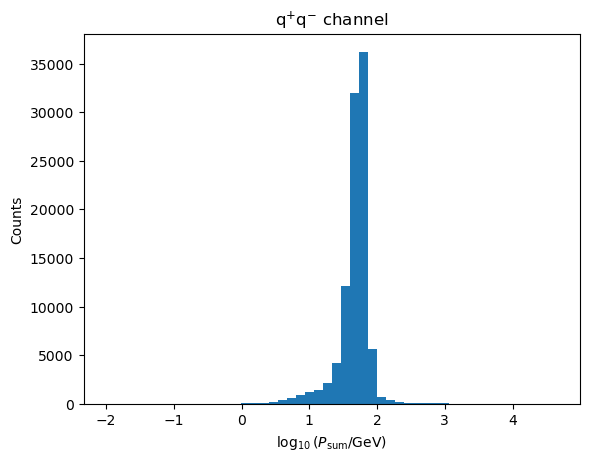

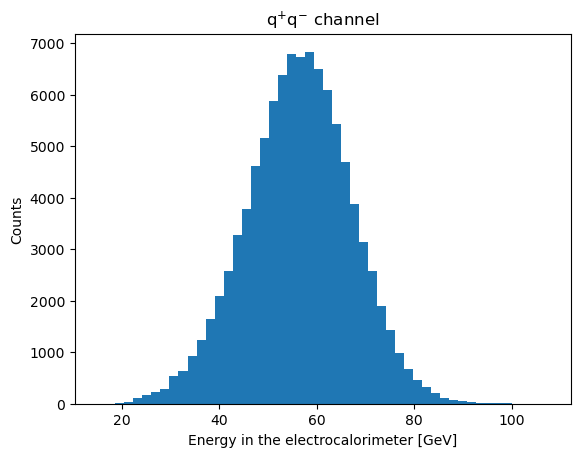

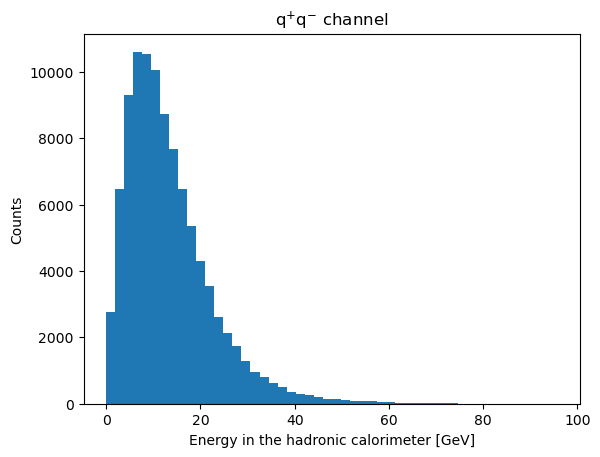

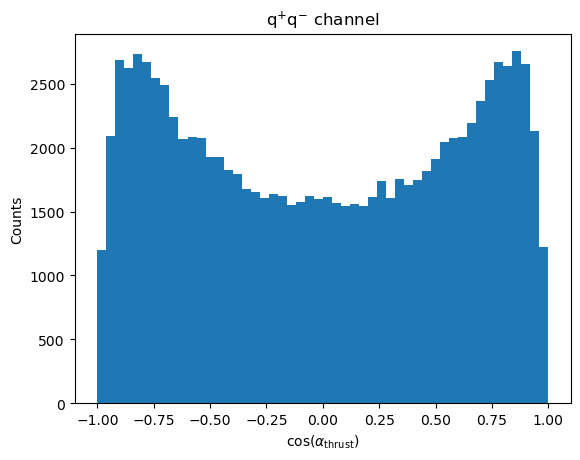

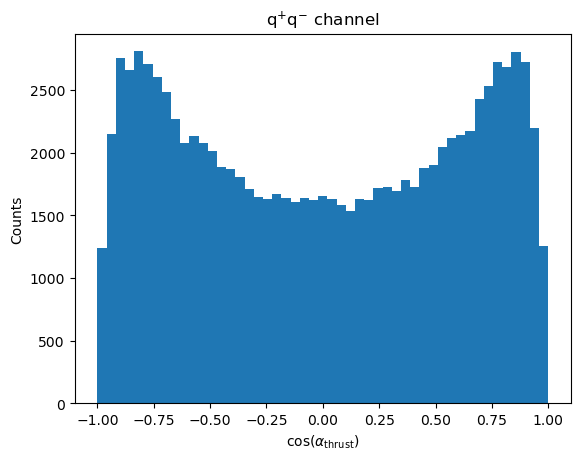

In [373]:
#Solution 2.1.1 qq-channel
#Here we do not plot the histogram for the theta angle, because according to the preparation file this anlge is only meaningful in the case of the ee- and the mm-channel. 
file = uproot.open("../Data/MC/qq.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())


plt.hist(Ncharged,bins=50)
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()
# plt.savefig("../Figures/example.pdf") ## Use plt.savefig(<str filename>) to save the figures

plt.hist(Pcharged,bins=np.linspace(-5,100,50))
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

plt.hist(np.log10(Pcharged+0.01),bins=50)
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

plt.hist(E_ecal,bins=50)
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

plt.hist(E_hcal,bins=50)
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

plt.hist(cos_thru,bins=50)
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

# plt.hist(cos_thet,bins=50)
# plt.xlabel(r"$\cos(\theta)$")
# plt.ylabel("Counts")
# plt.title(r"$\rm{q^{+}q^{-}}$ channel")
# plt.show()

plt.hist(cos_thru,bins=np.linspace(-1,1,50))
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{q^{+}q^{-}}$ channel")
plt.show()

# plt.hist(cos_thet,bins=np.linspace(-1,1,50))
# plt.xlabel(r"$\cos(\theta)$")
# plt.ylabel("Counts")
# plt.title(r"$\rm{q^{+}q^{-}}$ channel")
# plt.show()

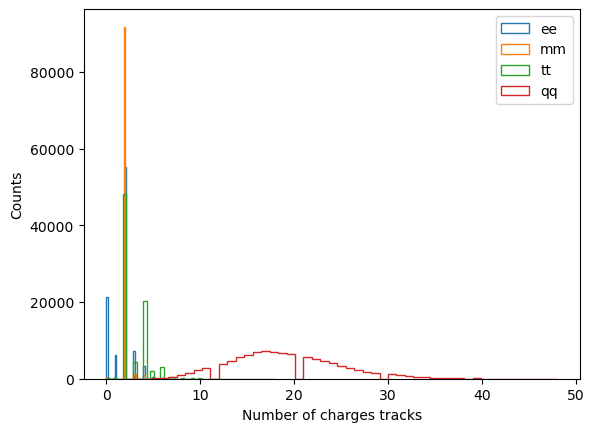

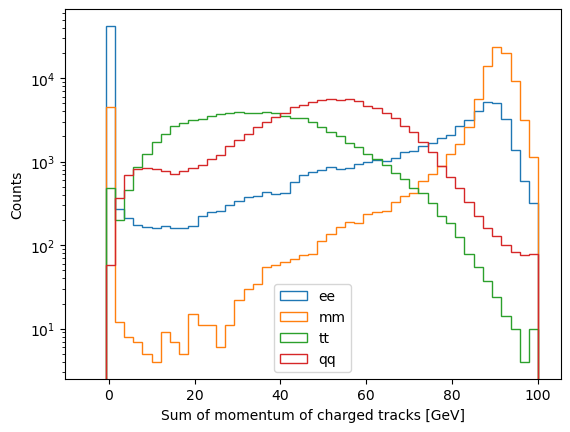

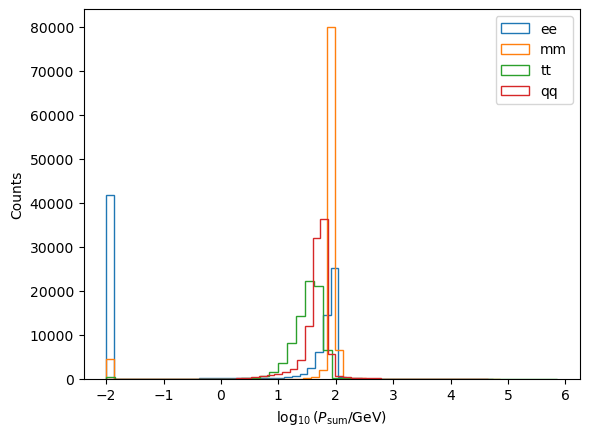

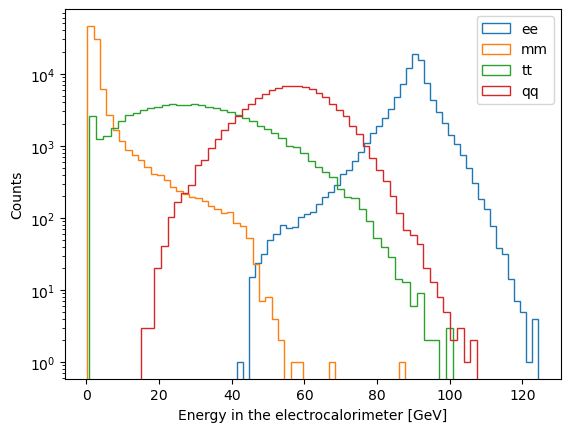

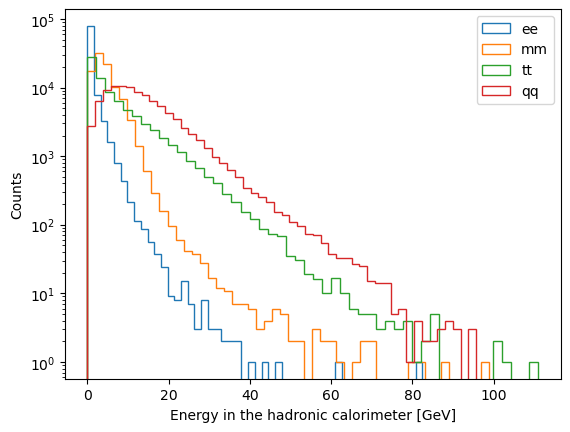

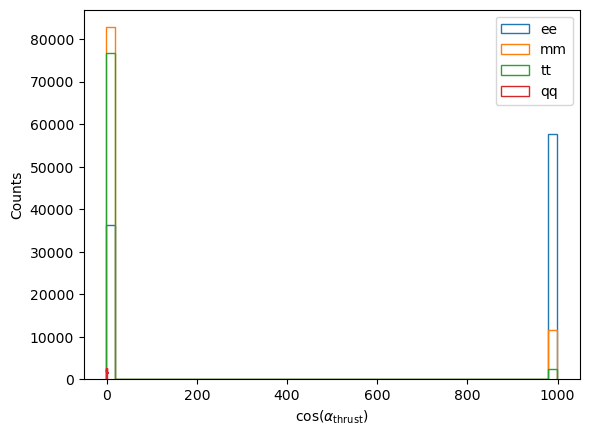

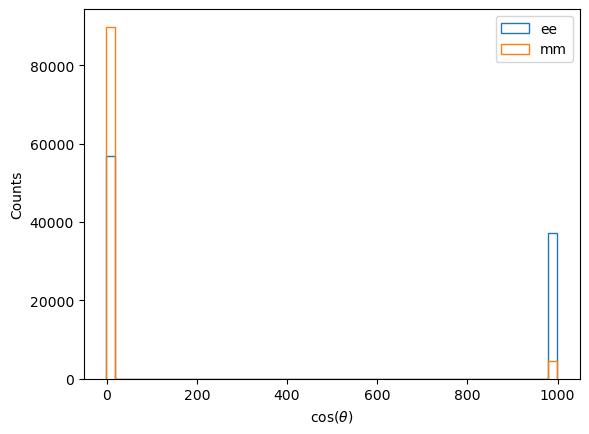

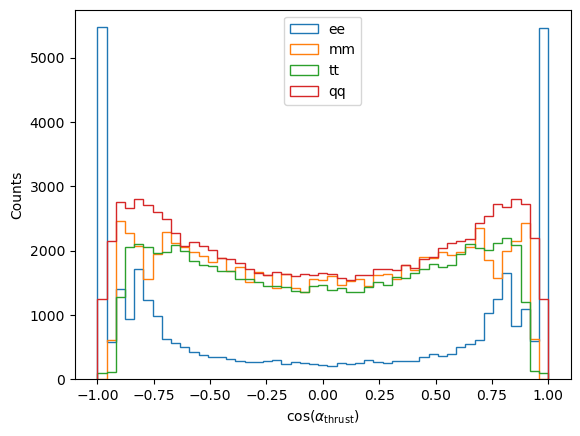

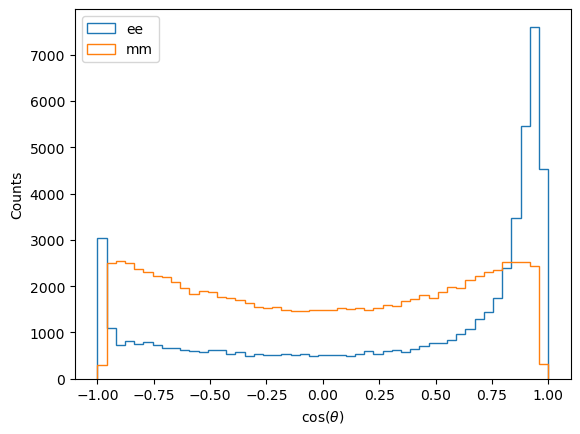

In [374]:
#Solution 2.1.2 
ee_file = uproot.open("../Data/MC/ee.root")
ee_tree = ee_file['h3']

Ncharged_ee = np.array(ee_tree['Ncharged'].array())
Pcharged_ee = np.array(ee_tree['Pcharged'].array())
E_ecal_ee = np.array(ee_tree['E_ecal'].array())
E_hcal_ee = np.array(ee_tree['E_hcal'].array())
cos_thru_ee = np.array(ee_tree['cos_thru'].array())
cos_thet_ee = np.array(ee_tree['cos_thet'].array())

mm_file = uproot.open("../Data/MC/mm.root")
mm_tree = mm_file['h3']

Ncharged_mm = np.array(mm_tree['Ncharged'].array())
Pcharged_mm = np.array(mm_tree['Pcharged'].array())
E_ecal_mm = np.array(mm_tree['E_ecal'].array())
E_hcal_mm = np.array(mm_tree['E_hcal'].array())
cos_thru_mm = np.array(mm_tree['cos_thru'].array())
cos_thet_mm = np.array(mm_tree['cos_thet'].array())

tt_file = uproot.open("../Data/MC/tt.root")
tt_tree = tt_file['h3']

Ncharged_tt = np.array(tt_tree['Ncharged'].array())
Pcharged_tt = np.array(tt_tree['Pcharged'].array())
E_ecal_tt = np.array(tt_tree['E_ecal'].array())
E_hcal_tt = np.array(tt_tree['E_hcal'].array())
cos_thru_tt = np.array(tt_tree['cos_thru'].array())
cos_thet_tt = np.array(tt_tree['cos_thet'].array())

qq_file = uproot.open("../Data/MC/qq.root")
qq_tree = qq_file['h3']

Ncharged_qq = np.array(qq_tree['Ncharged'].array())
Pcharged_qq = np.array(qq_tree['Pcharged'].array())
E_ecal_qq = np.array(qq_tree['E_ecal'].array())
E_hcal_qq = np.array(qq_tree['E_hcal'].array())
cos_thru_qq = np.array(qq_tree['cos_thru'].array())
cos_thet_qq = np.array(qq_tree['cos_thet'].array())

plt.hist(Ncharged_ee,bins=50, histtype='step', label = "ee")
plt.hist(Ncharged_mm,bins=50, histtype='step', label = "mm")
plt.hist(Ncharged_tt,bins=50, histtype='step', label = "tt")
plt.hist(Ncharged_qq,bins=50, histtype='step', label = "qq")
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.legend()
plt.savefig("Task_2_1_2/Ncharged.png")
plt.show()

plt.hist(Pcharged_ee,bins=np.linspace(-5,100,50), histtype='step', label = 'ee')
plt.hist(Pcharged_mm,bins=np.linspace(-5,100,50), histtype='step', label = 'mm')
plt.hist(Pcharged_tt,bins=np.linspace(-5,100,50), histtype='step', label = 'tt')
plt.hist(Pcharged_qq,bins=np.linspace(-5,100,50), histtype='step', label = 'qq')
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.yscale("log")
plt.legend()
plt.savefig("Task_2_1_2/Pcharged.png")
plt.show()

plt.hist(np.log10(Pcharged_ee+0.01),bins=50, histtype='step',label = 'ee')
plt.hist(np.log10(Pcharged_mm+0.01),bins=50, histtype='step',label = 'mm')
plt.hist(np.log10(Pcharged_tt+0.01),bins=50, histtype='step',label = 'tt')
plt.hist(np.log10(Pcharged_qq+0.01),bins=50, histtype='step',label = 'qq')
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.legend()
plt.show()

plt.hist(E_ecal_ee,bins=50, histtype='step', label = 'ee')
plt.hist(E_ecal_mm,bins=50, histtype='step', label = 'mm')
plt.hist(E_ecal_tt,bins=50, histtype='step', label = 'tt')
plt.hist(E_ecal_qq,bins=50, histtype='step', label = 'qq')
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.yscale("log")
plt.legend()
plt.savefig("Task_2_1_2/E_ecal.png")
plt.show()

plt.hist(E_hcal_ee,bins=50, histtype = 'step', label='ee')
plt.hist(E_hcal_mm,bins=50, histtype = 'step', label='mm')
plt.hist(E_hcal_tt,bins=50, histtype = 'step', label='tt')
plt.hist(E_hcal_qq,bins=50, histtype = 'step', label='qq')
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.yscale("log")
plt.legend()
plt.savefig("Task_2_1_2/E_hcal.png")
plt.show()

plt.hist(cos_thru_ee,bins=50, histtype='step', label='ee')
plt.hist(cos_thru_mm,bins=50, histtype='step', label='mm')
plt.hist(cos_thru_tt,bins=50, histtype='step', label='tt')
plt.hist(cos_thru_qq,bins=50, histtype='step', label='qq')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.legend()
plt.show()

plt.hist(cos_thet_ee,bins=50, histtype='step', label='ee')
plt.hist(cos_thet_mm,bins=50, histtype='step', label='mm')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.legend()
plt.show()

plt.hist(cos_thru_ee,bins=np.linspace(-1,1,50),histtype = 'step', label='ee')
plt.hist(cos_thru_mm,bins=np.linspace(-1,1,50),histtype = 'step', label='mm')
plt.hist(cos_thru_tt,bins=np.linspace(-1,1,50),histtype = 'step', label='tt')
plt.hist(cos_thru_qq,bins=np.linspace(-1,1,50),histtype = 'step', label='qq')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.legend()
plt.savefig("Task_2_1_2/cos_thru.png")
plt.show()

plt.hist(cos_thet_ee,bins=np.linspace(-1,1,50), histtype='step', label='ee')
plt.hist(cos_thet_mm,bins=np.linspace(-1,1,50), histtype='step', label='mm')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.legend()
plt.savefig("Task_2_1_2/cos_thet.png")
plt.show()

## Part 2.2 - Separating s-t channels

For $\rm{e^{+}e^{-}}$ channel, not only annihiliation processes (s-channel) are present, but also scattering processes (t-channel). Nevertheless, the Z0 boson can only be produced in the first one and, thus, only those events contribute to the decay width. For that reason, those events must also be selected out.

The two channels differ on their angular distribution:

$\frac{d\sigma}{d\Omega} \alpha \left\{\begin{array}{@{}lr@{}}
        1+\cos^2(\theta), & \text{s-channel}\\
        (1-\cos \theta)^{-2}, & \text{t-channel}\\
        \end{array}\right.$

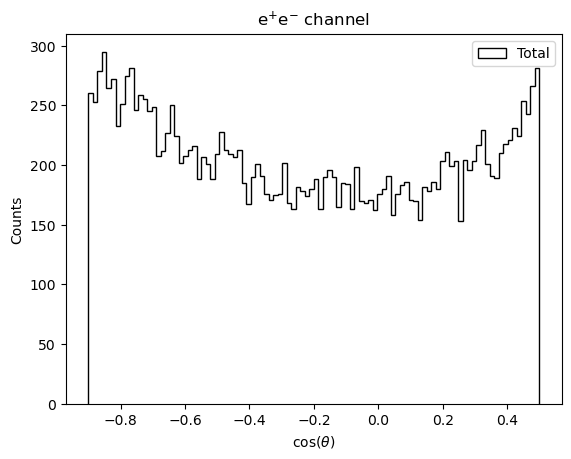

In [375]:
file = uproot.open("../Data/MC/ee.root")
tree = file['h3']

cos_thet = np.array(tree['cos_thet'].array())

# A first safe cos_theta cut must be applied

mask_safe = (cos_thet>-0.9) & (cos_thet<0.5)

data_hist = plt.hist(cos_thet[mask_safe],bins=np.linspace(-0.9,0.5,101),color='black',label='Total',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

We now define a fit function of the type:

$a (1+\cos^2(\theta)) + b (1-\cos \theta)^2$

where $a$ and $b$ are free parameters

In [376]:
def fitFunction(x,a,b):
    
    return(a*(1+x*x) + b*1/(1-x)**2)

Fitted parameters:
a = 156.0605806321217 +- 1.745865192485392
b = 16.390767821098247 +- 1.5615445898817786


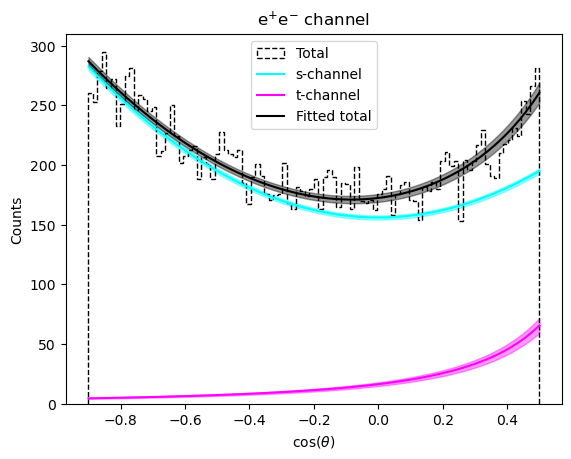

In [380]:
popt, pcov = curve_fit(fitFunction, data_hist[1][:-1] + (data_hist[1][1] - data_hist[1][0])/2., data_hist[0], bounds=(0,10000))
print("Fitted parameters:")
print(f"a = {popt[0]} +- { np.sqrt(np.diag(pcov))[0] }")
print(f"b = {popt[1]} +- { np.sqrt(np.diag(pcov))[1] }")

plt.hist(cos_thet[mask_safe],bins=np.linspace(-0.9,0.5,101),color='black',label='Total',histtype='step',linestyle='--')
plt.plot(np.linspace(-0.9,0.5,101),popt[0] * (1+np.linspace(-0.9,0.5,101) ** 2),label='s-channel',color='cyan')
plt.fill_between(np.linspace(-0.9,0.5,101),(popt[0]-np.sqrt(np.diag(pcov))[0]) * (1+np.linspace(-0.9,0.5,101) ** 2),(popt[0]+np.sqrt(np.diag(pcov))[0]) * (1+np.linspace(-0.9,0.5,101) ** 2),alpha=0.4,color='cyan')
plt.plot(np.linspace(-0.9,0.5,101),popt[1] * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,label='t-channel',color='magenta')
plt.fill_between(np.linspace(-0.9,0.5,101),(popt[1]-np.sqrt(np.diag(pcov))[1]) * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,(popt[1]+np.sqrt(np.diag(pcov))[1]) * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,alpha=0.4,color='magenta')
plt.plot(np.linspace(-0.9,0.5,101),popt[0] * (1+np.linspace(-0.9,0.5,101) ** 2) + popt[1] * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,color='black',label='Fitted total')
plt.fill_between(np.linspace(-0.9,0.5,101),(popt[0]-np.sqrt(np.diag(pcov))[0]) * (1+np.linspace(-0.9,0.5,101) ** 2) + (popt[1]-np.sqrt(np.diag(pcov))[1]) * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,(popt[0]+np.sqrt(np.diag(pcov))[0]) * (1+np.linspace(-0.9,0.5,101) ** 2) + (popt[1]+np.sqrt(np.diag(pcov))[1]) * 1/(1-np.linspace(-0.9,0.5,101)) ** 2,alpha=0.4,color='black')

plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.savefig("Task_2_2/s_t_seperation.png")
plt.show()

### Exercises

Using the results of the fit:

2.2.1. Calculate the fraction of s-channel events in the region $\cos \theta \in [-0.9,0.5]$

2.2.2. Calculate the total number of s-channel events in $\cos \theta \in [-1,1]$

0.9152666970921277
0.08473330290787193
0.6791467059989803
0.6609646226481741
24656.624283267487


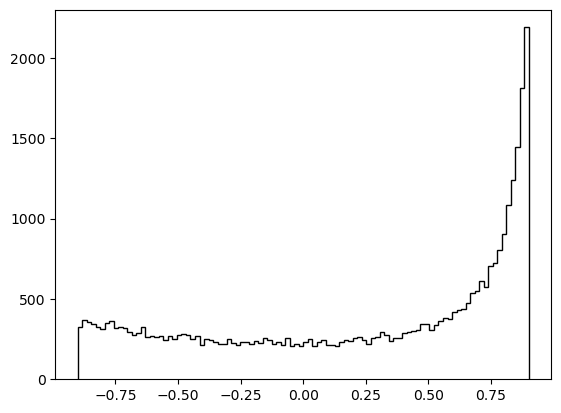

In [112]:
# from 2.2.1.
fracSChannel = sum(popt[0] * (1+np.linspace(-0.9,0.5,101) ** 2))/sum(popt[0] * (1+np.linspace(-0.9,0.5,101) ** 2) + popt[1] * 1/(1-np.linspace(-0.9,0.5,101)) ** 2)
print(fracSChannel)
fracTChannel = sum(popt[1] * 1/(1-np.linspace(-0.9,0.5,101)) ** 2)/sum(popt[0] * (1+np.linspace(-0.9,0.5,101) ** 2) + popt[1] * 1/(1-np.linspace(-0.9,0.5,101)) ** 2)
print(fracTChannel)

# from 2.2.2.
# New fraction of s-channel
###
# New fit
mask_new = (cos_thet>-0.9) & (cos_thet<0.9)
data_hist_new = plt.hist(cos_thet[mask_new],bins=np.linspace(-0.9,0.9,101),color='black',label='Total',histtype='step')
popt_new, pcov_new = curve_fit(fitFunction, data_hist_new[1][:-1] + (data_hist_new[1][1] - data_hist_new[1][0])/2., data_hist_new[0], bounds=(0,10000))

fracSChannel_extra = sum(popt[0] * (1+np.linspace(-0.9,0.9,101) ** 2))/sum(popt[0] * (1+np.linspace(-0.9,0.9,101) ** 2) + popt[1] * 1/(1-np.linspace(-0.9,0.9,101)) ** 2)
fracSChannel_new = sum(popt_new[0] * (1+np.linspace(-0.9,0.9,101) ** 2))/sum(popt_new[0] * (1+np.linspace(-0.9,0.9,101) ** 2) + popt_new[1] * 1/(1-np.linspace(-0.9,0.9,101)) ** 2)
print(fracSChannel_extra)
print(fracSChannel_new)
###
totalSChannel = len(cos_thet[mask_new]) * fracSChannel_new
print(totalSChannel)

## Part 2.3 - Defining selection cuts

As we just learned, events cannot be singularly defined, but they can be defined by their distributions. The idea of this part if to come up with four sets of cuts to separate the four channels

0.001300611927251018 (122/93802) events of channel ee surviving example random cuts
0.00122 (122/100000) events of channel ee surviving example random cuts


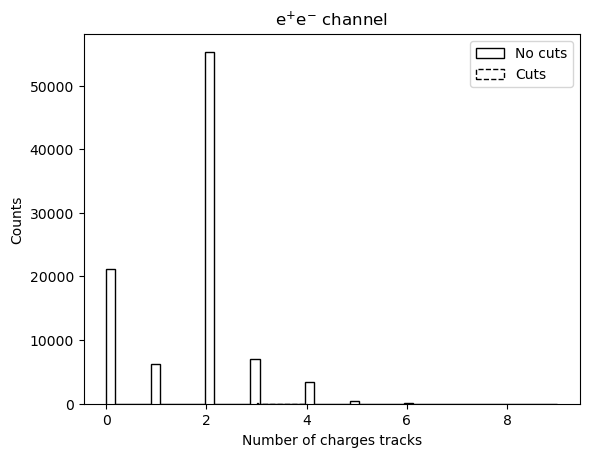

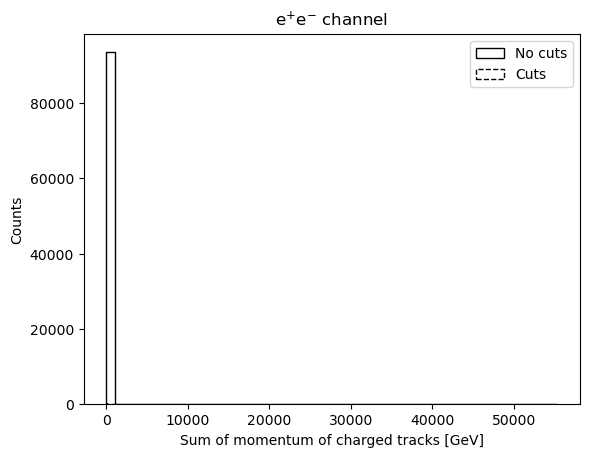

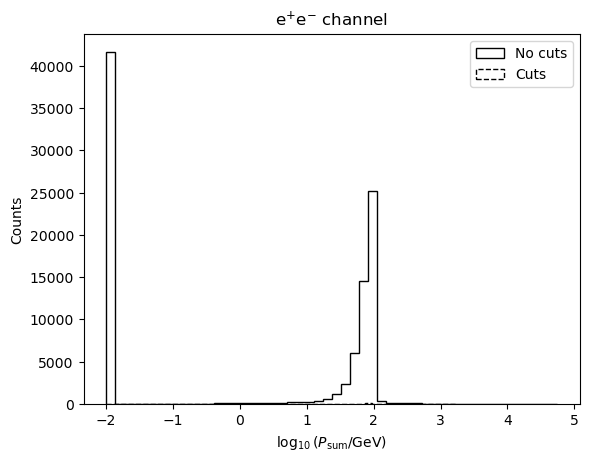

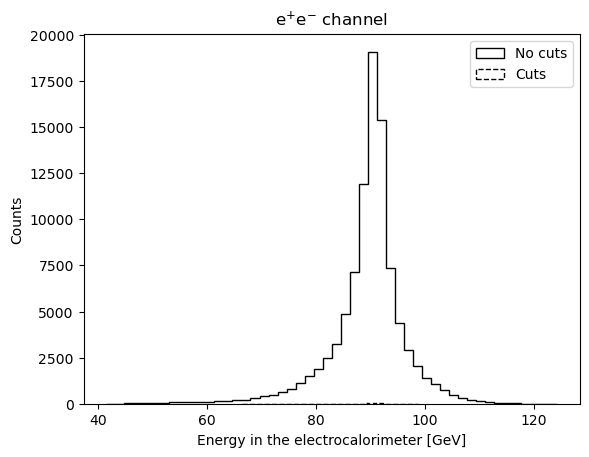

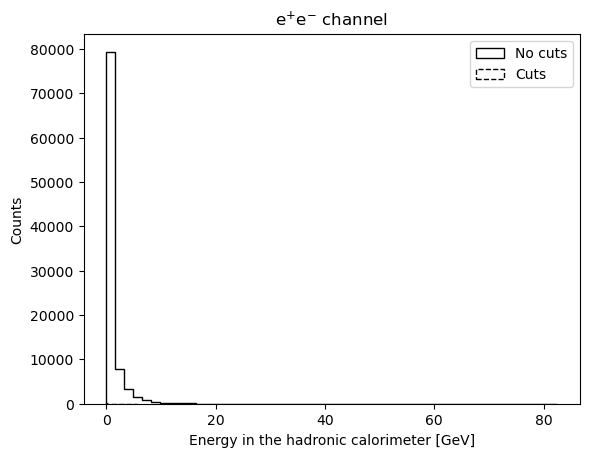

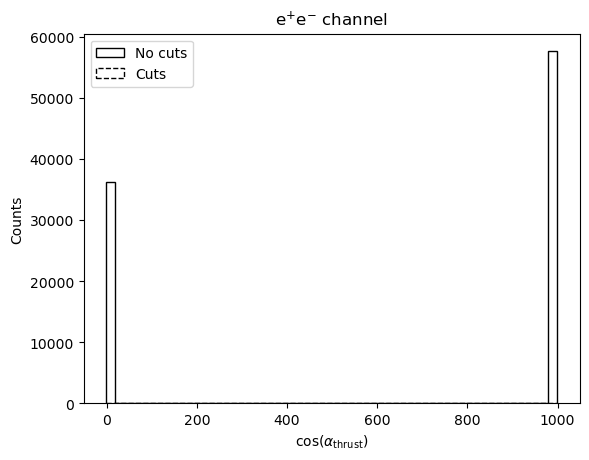

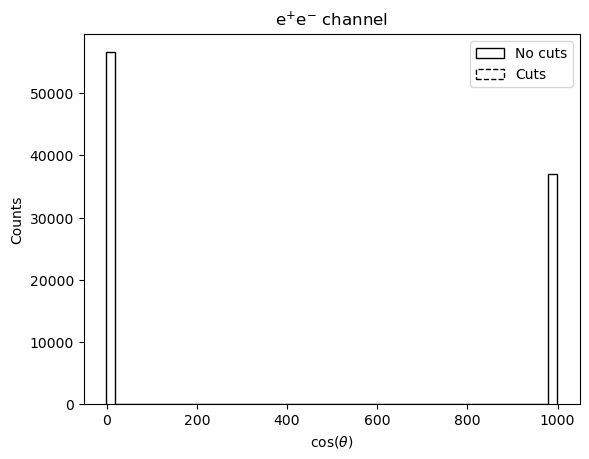

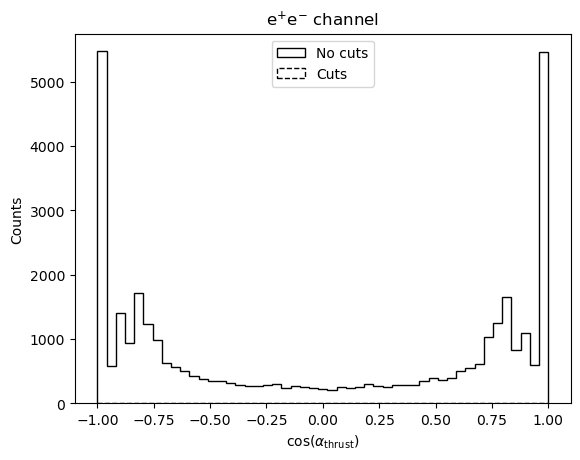

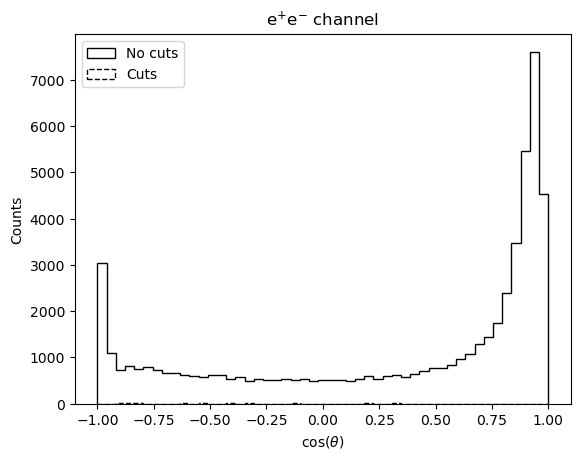

In [136]:
# Example for a single channel

file = uproot.open("../Data/MC/ee.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_safe = mask_safe = (cos_thet>-0.9) & (cos_thet<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
mask = (mask_safe) & (Ncharged > 2) & (Ncharged < 10) & (cos_thru > -0.7) & (E_ecal < 100) # completely random cuts, just to show the syntax needed!

print(f"{len(E_ecal[mask])/len(E_ecal)} ({len(E_ecal[mask])}/{len(E_ecal)}) events of channel ee surviving example random cuts")
print(f"{len(E_ecal[mask])/100000} ({len(E_ecal[mask])}/100000) events of channel ee surviving example random cuts")

plt.hist(Ncharged,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(Ncharged[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(Pcharged,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(Pcharged[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(np.log10(Pcharged+0.01),bins=50,color='black',label='No cuts',histtype='step')
plt.hist(np.log10(Pcharged[mask]+0.01),bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_ecal,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_ecal[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(E_hcal,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_hcal[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thru,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thru[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thet[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thru,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thru[mask],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

plt.hist(cos_thet,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thet[mask],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

### Exercises

2.3.1. Come up with four sets of cuts, one for each channel and show the impact on the histograms for every channel for each cut.

2.3.2. Build a 4x4 matrix containing the fraction of events of MC simulations of channel $i$ surviving the cuts to select events of channel $j$.

2.3.3. Correct all the entries in the matrix for MC simulations of channel e+e- in order to keep only s-channel events using the numbers fracSChannel and totalSChannel calculated in the previous step.

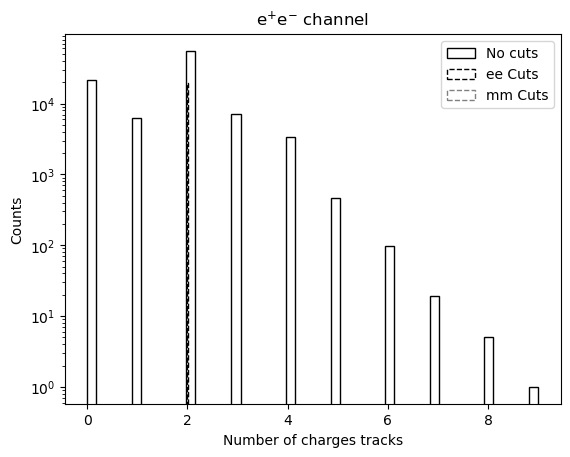

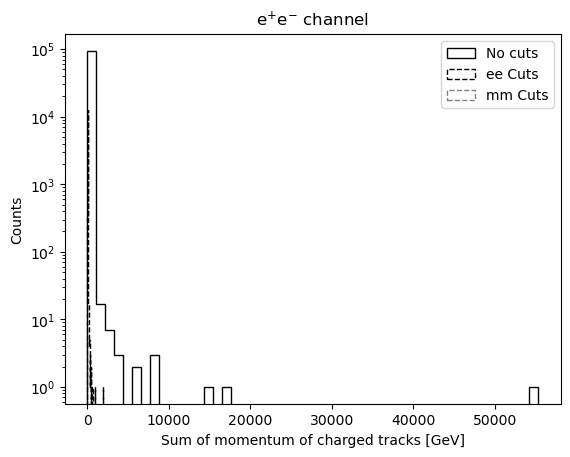

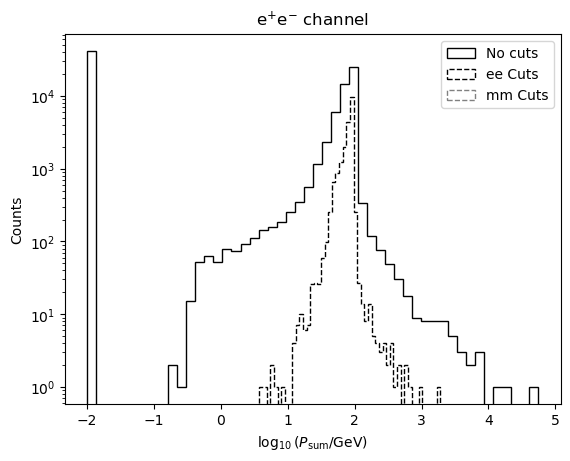

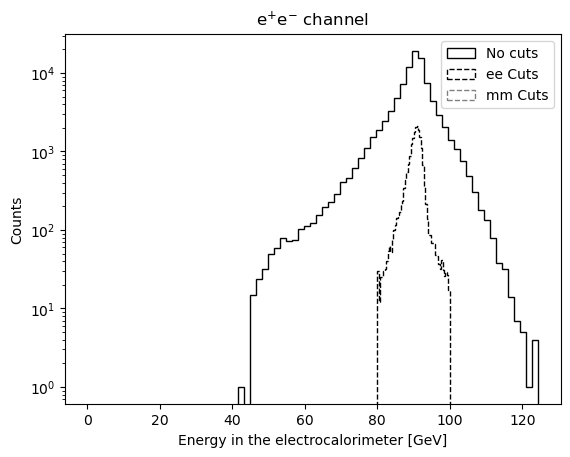

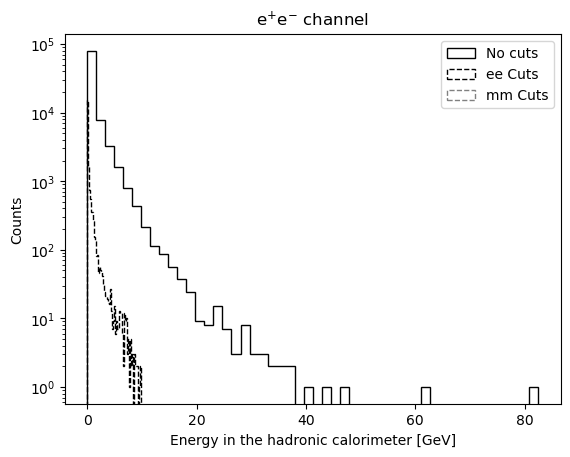

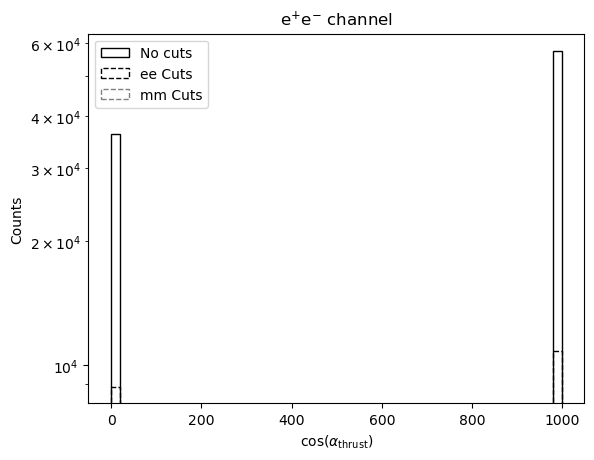

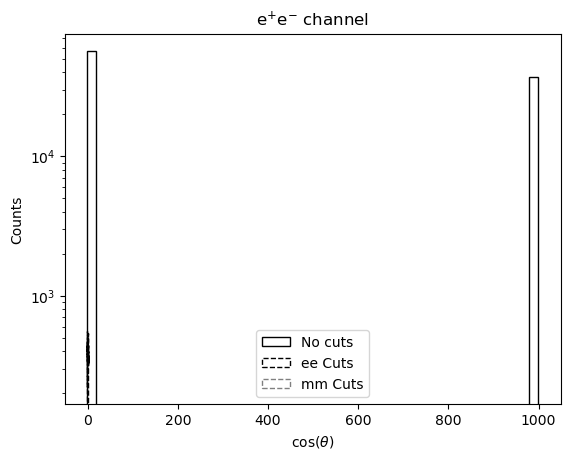

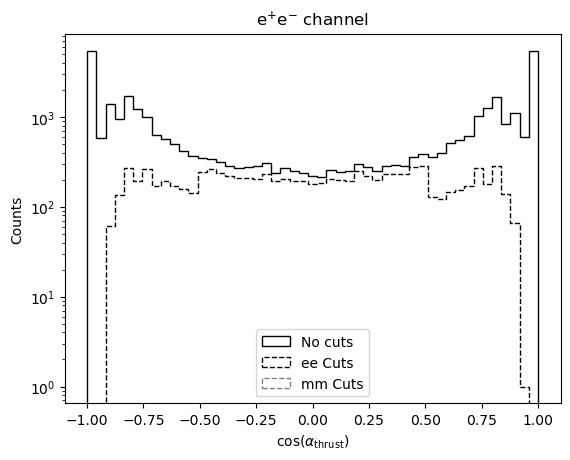

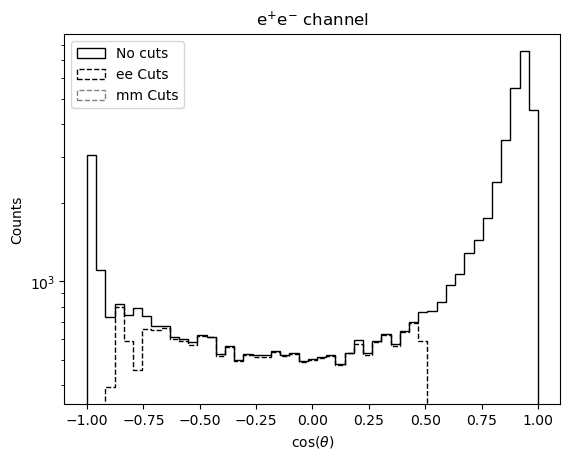

0.21011279077205178 (19709/93802) events of ../Data/MC/ee.root surviving ee cuts
0.19709 (19709/100000) events of ../Data/MC/ee.root surviving ee cuts

0.0 (0/93802) events of ../Data/MC/ee.root surviving mm cuts
0.0 (0/100000) events of ../Data/MC/ee.root surviving mm cuts

0.0005223769216008187 (49/93802) events of ../Data/MC/ee.root surviving tt cuts
0.00049 (49/100000) events of ../Data/MC/ee.root surviving tt cuts

0.0 (0/93802) events of ../Data/MC/ee.root surviving qq cuts
0.0 (0/100000) events of ../Data/MC/ee.root surviving qq cuts

0.0 (0/94381) events of ../Data/MC/mm.root surviving ee cuts
0.0 (0/100000) events of ../Data/MC/mm.root surviving ee cuts

0.8966529280257679 (84627/94381) events of ../Data/MC/mm.root surviving mm cuts
0.84627 (84627/100000) events of ../Data/MC/mm.root surviving mm cuts

0.06378402432693021 (6020/94381) events of ../Data/MC/mm.root surviving tt cuts
0.0602 (6020/100000) events of ../Data/MC/mm.root surviving tt cuts

0.0 (0/94381) events of ../D

In [446]:
# Exercise
# Get parameters
def parameters(tree):
    Ncharged = np.array(tree['Ncharged'].array())
    Pcharged = np.array(tree['Pcharged'].array())
    E_ecal = np.array(tree['E_ecal'].array())
    E_hcal = np.array(tree['E_hcal'].array())
    cos_thru = np.array(tree['cos_thru'].array())
    E_lep = np.array(tree['E_lep'].array())
    cos_thet = np.array(tree['cos_thet'].array())

    return Ncharged, Pcharged, E_ecal, E_hcal, cos_thru, E_lep, cos_thet


# Load sets and results
file = uproot.open("../Data/MC/ee.root")
tree = file['h3']
Ncharged_ee, Pcharged_ee, E_ecal_ee, E_hcal_ee, cos_thru_ee, E_lep_ee, cos_thet_ee = parameters(tree)

# We load the ee file and apply all masks to this file
mask_ee_ee = (cos_thet_ee>-0.9) & (cos_thet_ee<0.5) & (Ncharged_ee == 2) & (Pcharged_ee > 0.1) & (E_ecal_ee >80) & (E_ecal_ee < 100) & (E_hcal_ee < 10)
mask_ee_mm = (Ncharged_ee == 2) & (Pcharged_ee > 70) & (E_ecal_ee < 20)
mask_ee_tt = (Ncharged_ee > 1) & (Ncharged_ee < 8) & (Pcharged_ee > 0) & (Pcharged_ee < 80) & (E_ecal_ee > 0) & (E_ecal_ee < 70) & (E_hcal_ee > 0) & (E_hcal_ee < 30)                
mask_ee_qq = (Ncharged_ee > 7) & (Pcharged_ee > 20) & (Pcharged_ee < 80) & (E_ecal_ee > 30) & (E_ecal_ee < 80) & (E_hcal_ee > 0) & (E_hcal_ee < 40)   

file = uproot.open("../Data/MC/mm.root")
tree = file['h3']
Ncharged_mm, Pcharged_mm, E_ecal_mm, E_hcal_mm, cos_thru_mm, E_lep_mm, cos_thet_mm = parameters(tree)

# We load the mm file and apply all masks to this file
mask_mm_ee = (cos_thet_mm>-0.9) & (cos_thet_mm<0.5) & (Ncharged_mm == 2) & (Pcharged_mm > 0.1) & (E_ecal_mm >80) & (E_ecal_mm < 100) & (E_hcal_mm < 10)
mask_mm_mm = (Ncharged_mm == 2) & (Pcharged_mm > 70) & (E_ecal_mm < 20)
mask_mm_tt = (Ncharged_mm > 1) & (Ncharged_mm < 8) & (Pcharged_mm > 0) & (Pcharged_mm < 80) & (E_ecal_mm > 0) & (E_ecal_mm < 70) & (E_hcal_mm > 0) & (E_hcal_mm < 30)                
mask_mm_qq = (Ncharged_mm > 7) & (Pcharged_mm > 20) & (Pcharged_mm < 80) & (E_ecal_mm > 30) & (E_ecal_mm < 80) & (E_hcal_mm > 0) & (E_hcal_mm < 40)   

file = uproot.open("../Data/MC/tt.root")
tree = file['h3']
Ncharged_tt, Pcharged_tt, E_ecal_tt, E_hcal_tt, cos_thru_tt, E_lep_tt, cos_thet_tt = parameters(tree)

# We load the tt file and apply all masks to this file
mask_tt_ee = (cos_thet_tt>-0.9) & (cos_thet_tt<0.5) & (Ncharged_tt == 2) & (Pcharged_tt > 0.1) & (E_ecal_tt >80) & (E_ecal_tt < 100) & (E_hcal_tt < 10)
mask_tt_mm = (Ncharged_tt == 2) & (Pcharged_tt > 70) & (E_ecal_tt < 20)
mask_tt_tt = (Ncharged_tt > 1) & (Ncharged_tt < 8) & (Pcharged_tt > 0) & (Pcharged_tt < 80) & (E_ecal_tt > 0) & (E_ecal_tt < 70) & (E_hcal_tt > 0) & (E_hcal_tt < 30)                
mask_tt_qq = (Ncharged_tt > 7) & (Pcharged_tt > 20) & (Pcharged_tt < 80) & (E_ecal_tt > 30) & (E_ecal_tt < 80) & (E_hcal_tt > 0) & (E_hcal_tt < 40)  

file = uproot.open("../Data/MC/qq.root")
tree = file['h3']
Ncharged_qq, Pcharged_qq, E_ecal_qq, E_hcal_qq, cos_thru_qq, E_lep_qq, cos_thet_qq = parameters(tree)

# We load the qq file and apply all masks to this file
mask_qq_ee = (cos_thet_qq>-0.9) & (cos_thet_qq<0.5) & (Ncharged_qq == 2) & (Pcharged_qq > 0.1) & (E_ecal_qq >80) & (E_ecal_qq < 100) & (E_hcal_qq < 10)
mask_qq_mm = (Ncharged_qq == 2) & (Pcharged_qq > 70) & (E_ecal_qq < 20)
mask_qq_tt = (Ncharged_qq > 1) & (Ncharged_qq < 8) & (Pcharged_qq > 0) & (Pcharged_qq < 80) & (E_ecal_qq > 0) & (E_ecal_qq < 70) & (E_hcal_qq > 0) & (E_hcal_qq < 30)                
mask_qq_qq = (Ncharged_qq > 7) & (Pcharged_qq > 20) & (Pcharged_qq < 80) & (E_ecal_qq > 30) & (E_ecal_qq < 80) & (E_hcal_qq > 0) & (E_hcal_qq < 40)  


# Plot
# Charged Tracks
plt.hist(Ncharged_ee,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(Ncharged_ee[mask_ee_ee],bins=50,color='black',linestyle='--',label='ee Cuts',histtype='step')
plt.hist(Ncharged_ee[mask_ee_mm],bins=50,color='grey',linestyle='--',label='mm Cuts',histtype='step')
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.yscale("log")
plt.savefig("Task_2_3_1/Ncharged_ee.png")
plt.show()

# Momentum Sum
plt.hist(Pcharged_ee,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(Pcharged_ee[mask_ee_ee],bins=50,color='black',linestyle='--',label='ee Cuts',histtype='step')
plt.hist(Pcharged_ee[mask_ee_mm],bins=50,color='grey',linestyle='--',label='mm Cuts',histtype='step')
plt.xlabel("Sum of momentum of charged tracks [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.yscale("log")
plt.savefig("Task_2_3_1/Pcharged_ee.png")
plt.show()

# Momentum Sum log-scale
plt.hist(np.log10(Pcharged_ee+0.01),bins=50,color='black',label='No cuts',histtype='step')
plt.hist(np.log10(Pcharged_ee[mask_ee_ee]+0.01),bins=50,color='black',linestyle='--',label='ee Cuts',histtype='step')
plt.hist(np.log10(Pcharged_ee[mask_ee_mm]+0.01),bins=50,color='grey',linestyle='--',label='mm Cuts',histtype='step')
plt.xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.yscale("log")
plt.show()

# Ecal
plt.hist(E_ecal_ee,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_ecal_ee[mask_ee_ee],bins=50,color='black',linestyle='--',label='ee Cuts',histtype='step')
plt.hist(E_ecal_ee[mask_ee_mm],bins=50,color='grey',linestyle='--',label='mm Cuts',histtype='step')
plt.xlabel("Energy in the electrocalorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.yscale("log")
plt.savefig("Task_2_3_1/Ecal_ee.png")
plt.show()

# Hcal
plt.hist(E_hcal_ee,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(E_hcal_ee[mask_ee_ee],bins=50,color='black',linestyle='--',label='ee Cuts',histtype='step')
plt.hist(E_hcal_ee[mask_ee_mm],bins=50,color='grey',linestyle='--',label='mm Cuts',histtype='step')
plt.xlabel("Energy in the hadronic calorimeter [GeV]")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.yscale("log")
plt.savefig("Task_2_3_1/Hcal_ee.png")
plt.show()

# Thrust
plt.hist(cos_thru_ee,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thru_ee[mask_ee_ee],bins=50,color='black',linestyle='--',label='ee Cuts',histtype='step')
plt.hist(cos_thru_ee[mask_ee_mm],bins=50,color='grey',linestyle='--',label='mm Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.yscale("log")
plt.show()

# Theta
plt.hist(cos_thet_ee,bins=50,color='black',label='No cuts',histtype='step')
plt.hist(cos_thet_ee[mask_ee_ee],bins=50,color='black',linestyle='--',label='ee Cuts',histtype='step')
plt.hist(cos_thet_ee[mask_ee_mm],bins=50,color='grey',linestyle='--',label='mm Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.yscale("log")
plt.show()

# Thrust cut
plt.hist(cos_thru_ee,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thru_ee[mask_ee_ee],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='ee Cuts',histtype='step')
plt.hist(cos_thru_ee[mask_ee_mm],bins=np.linspace(-1,1,50),color='grey',linestyle='--',label='mm Cuts',histtype='step')
plt.xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.yscale("log")
plt.savefig("Task_2_3_1/thrust_ee.png")
plt.show()

# Theta cut
plt.hist(cos_thet_ee,bins=np.linspace(-1,1,50),color='black',label='No cuts',histtype='step')
plt.hist(cos_thet_ee[mask_ee_ee],bins=np.linspace(-1,1,50),color='black',linestyle='--',label='ee Cuts',histtype='step')
plt.hist(cos_thet_ee[mask_ee_mm],bins=np.linspace(-1,1,50),color='grey',linestyle='--',label='mm Cuts',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.yscale("log")
plt.savefig("Task_2_3_1/cos_ee.png")
plt.show()

# Iterate over sets
for root in ("../Data/MC/ee.root", "../Data/MC/mm.root", "../Data/MC/tt.root", "../Data/MC/qq.root"):
    file = uproot.open(root)
    tree = file['h3']
    Ncharged, Pcharged, E_ecal, E_hcal, cos_thru, E_lep, cos_thet = parameters(tree)

    # Masks
    mask_ee = (cos_thet>-0.9) & (cos_thet<0.5) & (Ncharged == 2) & (Pcharged > 0.1) & (E_ecal >80) & (E_ecal < 100) & (E_hcal < 10)
    mask_mm = (Ncharged == 2) & (Pcharged > 70) & (E_ecal < 20)
    mask_tt = (Ncharged > 1) & (Ncharged < 8) & (Pcharged > 0) & (Pcharged < 80) & (E_ecal > 0) & (E_ecal < 70) & (E_hcal > 0) & (E_hcal < 30)                
    mask_qq = (Ncharged > 7) & (Pcharged > 20) & (Pcharged < 80) & (E_ecal > 30) & (E_ecal < 80) & (E_hcal > 0) & (E_hcal < 40)  

    for mask in (mask_ee, mask_mm, mask_tt, mask_qq):
        # Number of surviving particles
        if mask is mask_ee:
            mask_name = "ee"
        elif mask is mask_mm:
            mask_name = "mm"
        elif mask is mask_tt:
            mask_name = "tt"
        elif mask is mask_qq:
            mask_name = "qq"
        print(f"{len(E_ecal[mask])/len(E_ecal)} ({len(E_ecal[mask])}/{len(E_ecal)}) events of {root} surviving {mask_name} cuts")
        print(f"{len(E_ecal[mask])/100000} ({len(E_ecal[mask])}/100000) events of {root} surviving {mask_name} cuts")
        print("")


In [167]:
# Cut test
# ee channel, different cuts
file = uproot.open("../Data/MC/ee.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_ee = (cos_thet>-0.9) & (cos_thet<0.5) & (Ncharged == 2) & (Pcharged > 0.1) & (E_ecal >80) & (E_ecal < 100) & (E_hcal < 10)
mask_mm = (Ncharged == 2) & (Pcharged > 70) & (E_ecal < 20)
mask_tt = (Ncharged > 1) & (Ncharged < 8) & (Pcharged > 0) & (Pcharged < 80) & (E_ecal > 0) & (E_ecal < 70) & (E_hcal > 0) & (E_hcal < 30)                
mask_qq = (Ncharged > 7) & (Pcharged > 20) & (Pcharged < 80) & (E_ecal > 30) & (E_ecal < 80) & (E_hcal > 0) & (E_hcal < 40)   
print(f"{len(E_ecal[mask_ee])/len(E_ecal)} ({len(E_ecal[mask_ee])}/{len(E_ecal)})events of channel ee surviving ee cuts")
print(f"{len(E_ecal[mask_mm])/len(E_ecal)} ({len(E_ecal[mask_mm])}/{len(E_ecal)})events of channel ee surviving mm cuts")
print(f"{len(E_ecal[mask_tt])/len(E_ecal)} ({len(E_ecal[mask_tt])}/{len(E_ecal)})events of channel ee surviving tt cuts")
print(f"{len(E_ecal[mask_qq])/len(E_ecal)} ({len(E_ecal[mask_qq])}/{len(E_ecal)})events of channel ee surviving qq cuts")

# mm channel, different cuts
file = uproot.open("../Data/MC/mm.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_ee = (cos_thet>-0.9) & (cos_thet<0.5) & (Ncharged == 2) & (Pcharged > 0.1) & (E_ecal >80) & (E_ecal < 100) & (E_hcal < 10)
mask_mm = (Ncharged == 2) & (Pcharged > 70) & (E_ecal < 20)
mask_tt = (Ncharged > 1) & (Ncharged < 8) & (Pcharged > 0) & (Pcharged < 80) & (E_ecal > 0) & (E_ecal < 70) & (E_hcal > 0) & (E_hcal < 30)                
mask_qq = (Ncharged > 7) & (Pcharged > 20) & (Pcharged < 80) & (E_ecal > 30) & (E_ecal < 80) & (E_hcal > 0) & (E_hcal < 40)   
print(f"{len(E_ecal[mask_ee])/len(E_ecal)} ({len(E_ecal[mask_ee])}/{len(E_ecal)})events of channel mm surviving ee cuts")
print(f"{len(E_ecal[mask_mm])/len(E_ecal)} ({len(E_ecal[mask_mm])}/{len(E_ecal)})events of channel mm surviving mm cuts")
print(f"{len(E_ecal[mask_tt])/len(E_ecal)} ({len(E_ecal[mask_tt])}/{len(E_ecal)})events of channel mm surviving tt cuts")
print(f"{len(E_ecal[mask_qq])/len(E_ecal)} ({len(E_ecal[mask_qq])}/{len(E_ecal)})events of channel mm surviving qq cuts")

# tt channel, different cuts
file = uproot.open("../Data/MC/tt.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_ee = (cos_thet>-0.9) & (cos_thet<0.5) & (Ncharged == 2) & (Pcharged > 0.1) & (E_ecal >80) & (E_ecal < 100) & (E_hcal < 10)
mask_mm = (Ncharged == 2) & (Pcharged > 70) & (E_ecal < 20)
mask_tt = (Ncharged > 1) & (Ncharged < 8) & (Pcharged > 0) & (Pcharged < 80) & (E_ecal > 0) & (E_ecal < 70) & (E_hcal > 0) & (E_hcal < 30)                
mask_qq = (Ncharged > 7) & (Pcharged > 20) & (Pcharged < 80) & (E_ecal > 30) & (E_ecal < 80) & (E_hcal > 0) & (E_hcal < 40)   
print(f"{len(E_ecal[mask_ee])/len(E_ecal)} ({len(E_ecal[mask_ee])}/{len(E_ecal)})events of channel tt surviving ee cuts")
print(f"{len(E_ecal[mask_mm])/len(E_ecal)} ({len(E_ecal[mask_mm])}/{len(E_ecal)})events of channel tt surviving mm cuts")
print(f"{len(E_ecal[mask_tt])/len(E_ecal)} ({len(E_ecal[mask_tt])}/{len(E_ecal)})events of channel tt surviving tt cuts")
print(f"{len(E_ecal[mask_qq])/len(E_ecal)} ({len(E_ecal[mask_qq])}/{len(E_ecal)})events of channel tt surviving qq cuts")

# qq channel, different cuts
file = uproot.open("../Data/MC/qq.root")
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_ee = (cos_thet>-0.9) & (cos_thet<0.5) & (Ncharged == 2) & (Pcharged > 0.1) & (E_ecal >80) & (E_ecal < 100) & (E_hcal < 10)
mask_mm = (Ncharged == 2) & (Pcharged > 70) & (E_ecal < 20)
mask_tt = (Ncharged > 1) & (Ncharged < 8) & (Pcharged > 0) & (Pcharged < 80) & (E_ecal > 0) & (E_ecal < 70) & (E_hcal > 0) & (E_hcal < 30)                
mask_qq = (Ncharged > 7) & (Pcharged > 20) & (Pcharged < 80) & (E_ecal > 30) & (E_ecal < 80) & (E_hcal > 0) & (E_hcal < 40)   
print(f"{len(E_ecal[mask_ee])/len(E_ecal)} ({len(E_ecal[mask_ee])}/{len(E_ecal)})events of channel qq surviving ee cuts")
print(f"{len(E_ecal[mask_mm])/len(E_ecal)} ({len(E_ecal[mask_mm])}/{len(E_ecal)})events of channel qq surviving mm cuts")
print(f"{len(E_ecal[mask_tt])/len(E_ecal)} ({len(E_ecal[mask_tt])}/{len(E_ecal)})events of channel qq surviving tt cuts")
print(f"{len(E_ecal[mask_qq])/len(E_ecal)} ({len(E_ecal[mask_qq])}/{len(E_ecal)})events of channel qq surviving qq cuts")

0.21011279077205178 (19709/93802)events of channel ee surviving ee cuts
0.0 (0/93802)events of channel ee surviving mm cuts
0.0005223769216008187 (49/93802)events of channel ee surviving tt cuts
0.0 (0/93802)events of channel ee surviving qq cuts
0.0 (0/94381)events of channel mm surviving ee cuts
0.8966529280257679 (84627/94381)events of channel mm surviving mm cuts
0.06378402432693021 (6020/94381)events of channel mm surviving tt cuts
0.0 (0/94381)events of channel mm surviving qq cuts
0.0004923372131188931 (39/79214)events of channel tt surviving ee cuts
0.0027141666877067185 (215/79214)events of channel tt surviving mm cuts
0.8335269018102861 (66027/79214)events of channel tt surviving tt cuts
0.004342666700330749 (344/79214)events of channel tt surviving qq cuts
0.0 (0/98563)events of channel qq surviving ee cuts
0.0 (0/98563)events of channel qq surviving mm cuts
0.007183222913263598 (708/98563)events of channel qq surviving tt cuts
0.8713614642411452 (85884/98563)events of chann

### Questions

1. There are two numbers to calculate the fraction of surviving events. Either dividing by the number of events without cuts or diving by 100000 which is the initial number of MC simulations. Why are those numbers different? Which one should be used?
2. In an ideal world how do we expect this 4x4 matrix to look like?
3. How can measure which of two possible 4x4 matrices is better?

In [400]:
k= (8/3)/(1.4+0.5**3/3+0.9**3/3)
print(k)
acceptanceMatrix = np.array([[19709,0,49,0],[0,84627,6020,0],[39,215,66027,344],[0,0,708,85884]])/100000 # between 0-1
correctedAcceptanceMatrix = np.array([[k*fracSChannel*19709,0,k*fracSChannel*49,0],[0,84627,6020,0],[39,215,66027,344],[0,0,708,85884]])/100000 # corrected after s-t separation
totalNumberOfEvents = np.array([[fracSChannel*19709,0,fracSChannel*49,0],[0,84627,6020,0],[39,215,66027,344],[0,0,708,85884]]) # real number of events used in the calculation

1.5829046299960425


# Part 3 - Getting the physical results

Now that we spent time learning from MC simulations how each channel works and quantitatively estimated the response of our analysis. We can apply it to real data, in which we cannot know what is the real channel that created that event.

With that we can estimate what was the initial total number of events in each channel and, thus, calculate the cross section and decay width.

## Part 3.1 - Calculate the number of real data events after cuts

From data, we have the total number of detected events for each energy bin, $k$, $N^{k}_{\rm{det}}$. We then apply each of our 4 cuts for each channel $j$, getting the number of detected events in each energy bin, $k$ and for each cut, $j$: $N^{j,k}_{\rm{det}}$

In [319]:
# Table with energy bins, don't change this

energy_bins = [44,44.5,45,45.4,45.8,46.2,46.7,47.2]

In [401]:
dataset = 1
file = uproot.open(f"../Data/Real/daten_{dataset}.root")
tree = file['h33']
Ncharged, Pcharged, E_ecal, E_hcal, cos_thru, E_lep, cos_thet = parameters(tree)

# Masks
mask_ee = (cos_thet>-0.9) & (cos_thet<0.5) & (Ncharged == 2) & (Pcharged > 0.1) & (E_ecal >80) & (E_ecal < 100) & (E_hcal < 10)
mask_mm = (Ncharged == 2) & (Pcharged > 70) & (E_ecal < 20)
mask_tt = (Ncharged > 1) & (Ncharged < 8) & (Pcharged > 0) & (Pcharged < 80) & (E_ecal > 0) & (E_ecal < 70) & (E_hcal > 0) & (E_hcal < 30)                
mask_qq = (Ncharged > 7) & (Pcharged > 20) & (Pcharged < 80) & (E_ecal > 30) & (E_ecal < 80) & (E_hcal > 0) & (E_hcal < 40)  

#N_det
N_det=np.zeros((7,4))

# Loop over masks
for j,mask in enumerate((mask_ee, mask_mm, mask_tt, mask_qq)):
    for i in range(7): # loop over energy bins
        mask_total = mask & (E_lep > energy_bins[i]) & (E_lep < energy_bins[i+1])
        N_det[i,j] = mask_total.sum()
        print(f"Number of real data events surviving in energy bins {i}: {mask_total.sum()}")
    print("")
print(N_det)

Number of real data events surviving in energy bins 0: 125
Number of real data events surviving in energy bins 1: 197
Number of real data events surviving in energy bins 2: 228
Number of real data events surviving in energy bins 3: 2375
Number of real data events surviving in energy bins 4: 341
Number of real data events surviving in energy bins 5: 131
Number of real data events surviving in energy bins 6: 176

Number of real data events surviving in energy bins 0: 133
Number of real data events surviving in energy bins 1: 242
Number of real data events surviving in energy bins 2: 331
Number of real data events surviving in energy bins 3: 3854
Number of real data events surviving in energy bins 4: 686
Number of real data events surviving in energy bins 5: 266
Number of real data events surviving in energy bins 6: 324

Number of real data events surviving in energy bins 0: 163
Number of real data events surviving in energy bins 1: 232
Number of real data events surviving in energy bins 

### Exercises

3.1.1. Get the vector $N_{\rm{det}}$ with the number of real data events surviving each set of cuts

In [402]:
N_det_old = np.array([[125,133,163,3073],
                 [197,242,232,4559],
                 [228,331,298,6490],
                 [2375,3854,3929,77710],
                 [341,686,654,12572],
                 [131,266,299,5656],
                 [176,324,321,6261]])

## Part 3.2 - Estimate the initial number of events in each channel

$N_{\rm{det}}$ doesn't represent the real number of initial events in each channel, because some events are cut out with the cuts and there is some cross contamination. This however is estimate by our acceptance matrix, $A$. We can, therefore, obtain $N_{init}$ by:

$N^{k}_{\rm{det}} = A N^{k}_{\rm{init}} \implies N^{k}_{\rm{init}} = A^{-1} N^{k}_{\rm{det}}$


### Exercises

3.2.1. Get the vector $N_{\rm{init}}$ by applying the inverted corrected acceptance matrix on the vector calculated in the previous step

In [403]:
A_inv = np.linalg.inv(correctedAcceptanceMatrix)
N_init = (A_inv@N_det.T).T
print(N_init)

[[  437.2013406    140.97549392   227.51941466  3576.2064675 ]
 [  689.11907646   263.0219435    322.46544644  5305.66455293]
 [  797.46684878   361.93914845   410.32818671  7553.32177872]
 [ 8303.99600798  4165.63379372  5460.9483287  90437.49299734]
 [ 1191.96309366   745.80108346   911.14480227 14630.8382176 ]
 [  457.74219271   284.63167298   417.35471941  6582.18658724]
 [  615.26536245   351.0804967    446.69614712  7286.38325099]]


## Part 3.3 - Estimate the cross sections without errors

Now that we estimated the real initial number of events in each channel, we can estimate the energy-dependent cross section for each channel.

The cross-section is given by:

$\sigma_{i}(E_{k}) = \frac{N_{i,j}}{L_{k}} + \eta_{i,k}$,

where $\eta_{i,k}$ are the radiation corrections (here given to you)

In [404]:
# Radiation correction

radcorr_lep = np.array([0.09,0.2,0.36,0.52,0.22,-0.01,-0.08])
radcorr_had = np.array([2.0,4.3,7.7,10.8,4.7,-0.2,-1.6])

# Luminosity and energy bins for each of the given datasets

LEP_energies = {}
LEP_luminosities = {}
LEP_luminosities_error = {}

LEP_energies[1] = np.array([88.48021,89.47158,90.22720,91.23223,91.97109,92.97091,93.71841])
LEP_luminosities[1] = np.array([675.8590,543.6270,419.7760,3122.204,639.8380,479.2400,766.8380])
LEP_luminosities_error[1] = np.array([3.502185,3.179205,2.810879,7.786547,3.567344,3.121618,3.972102])

LEP_energies[2] = np.array([88.47777,89.46906,90.22324,91.23965,91.96968,92.97059,93.71714])
LEP_luminosities[2] = np.array([371.9800,488.5300,378.5461,2072.793,540.6800,369.4000,353.5000])
LEP_luminosities_error[2] = np.array([2.594937,3.009684,2.670417,6.334670,3.274401,2.737608,2.695570])

LEP_energies[4] = np.array([88.47939,89.46793,90.22266,91.22430,91.96648,92.96465,93.71712])
LEP_luminosities[4] = np.array([463.9790,667.5236,486.7641,2246.568,535.9080,450.6000,709.6980])
LEP_luminosities_error[4] = np.array([2.902361,3.521166,3.033955,6.603405,3.265110,3.027953,3.819882])

LEP_energies[5] = np.array([88.47939,89.46957,90.23120,91.23193,91.97322,92.96836,93.71712])
LEP_luminosities[5] = np.array([463.9790,472.6636,510.2150,3898.628,518.6880,624.5900,709.6980])
LEP_luminosities_error[5] = np.array([2.902361,2.964559,3.099458,8.694719,3.213012,3.564113,3.819882])

LEP_energies[6] = np.array([88.48021,89.46928,90.22604,91.24186,91.96859,92.96836,93.71685])
LEP_luminosities[6] = np.array([675.8590,800.8436,873.7021,7893.498,825.2780,624.5900,942.2280])
LEP_luminosities_error[6] = np.array([3.502185,3.855322,4.057872,12.37099,4.051215,3.564113,4.403135])

In [405]:
# Read the proper values for the dataset you have chosen in 3.1
energies = LEP_energies[dataset]
luminosities = LEP_luminosities[dataset]
luminosities_error = LEP_luminosities_error[dataset]
print(luminosities)

[ 675.859  543.627  419.776 3122.204  639.838  479.24   766.838]


### Exercises

3.3.1. Calculate the cross section for each energy and channel for the chosen data set.

3.3.2. Plot the cross section as a function of energy for the four channels.

In [406]:
#3.3.1
sigma = np.zeros((7,4))
for k in range(7):
    for i in range(4):
        if(i<3):
            sigma[k,i] = N_init[k,i]/luminosities[k]+radcorr_lep[k]
        else:
            sigma[k,i] = N_init[k,i]/luminosities[k]+radcorr_had[k]
print(sigma)

[[ 0.73688247  0.29858714  0.4266374   7.29134992]
 [ 1.46763218  0.68382796  0.79317408 14.05975173]
 [ 2.25974379  1.22221973  1.3374932  25.69369611]
 [ 3.17965837  1.85419655  2.26906839 39.76591414]
 [ 2.08291388  1.38560924  1.64402421 27.56647279]
 [ 0.94514188  0.58392303  0.86086787 13.53463523]
 [ 0.72234073  0.37782877  0.50251697  7.9018547 ]]


## Part 3.4 - Fit a Breit-Wigner function to the cross sections

Once the cross sections have been calculated, the physical quantities of the Z0-boson can be retrieved by fitting the expected Breit-Wigner cross section to the data:

$\frac{a}{\frac{4 (x-b)^2}{c^2} + \left(\frac{x}{b}\right)^2}$

### Questions

1. What physical characteristic of the Z0 does each of the free parameters, $a$, $b$ and $c$ correspond to?
   $a$ is the peak cross section, $b$ is the resonance energy M_Z0 (mass of boson) and $c$ is the decay width GammaZ0

### Exercises

3.4.1. Fit a Breit-Wigner function to each of the channels.

3.4.2. Plot the measured data (as in 3.3.2) together with the fitted function. Present the error in the fit function as a shaded area.

(The cells of 2.2. may be useful examples here :D)

In [407]:
def BreitWigner(x,a,b,c):
    return(a/(4./(c**2) * ((x - [b])**2) + (x/[b])**2))

[ 3.19207588 91.04092612  2.68306121], 
 
 [[ 0.0103404  -0.00080002 -0.00979137]
 [-0.00080002  0.001611    0.00100567]
 [-0.00979137  0.00100567  0.01692695]]

[ 1.87982354 91.19318197  2.53459927], 
 
 [[ 0.00127997 -0.00016915 -0.00181426]
 [-0.00016915  0.00064585  0.00031411]
 [-0.00181426  0.00031411  0.00528978]]

[ 2.22739198 91.26633348  2.60728131], 
 
 [[ 0.00219193 -0.00021178 -0.00269528]
 [-0.00021178  0.00087219  0.00034863]
 [-0.00269528  0.00034863  0.00703794]]

[39.6796319  91.17486762  2.52681565], 
 
 [[ 1.50584096e-01 -9.69883496e-04 -1.01154493e-02]
 [-9.69883496e-04  1.66339579e-04  8.53127246e-05]
 [-1.01154493e-02  8.53127246e-05  1.38099535e-03]]



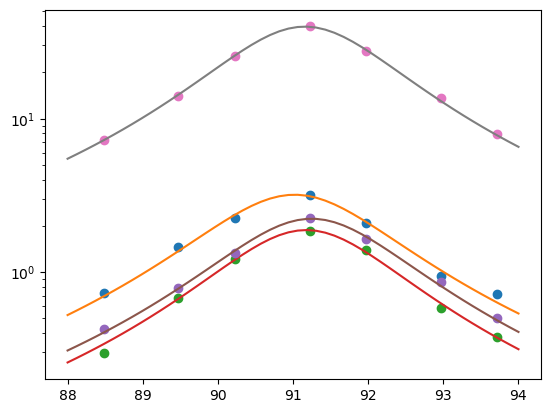

In [414]:
energies_plot = np.linspace(88, 94, num=50)

for i in range(4):
    plt.plot(energies, sigma[:,i], "o")
    popt, pcov = curve_fit(BreitWigner, energies, sigma[:,i], bounds=([-np.infty, 90, -np.infty], [np.infty, 92, np.infty]))
    plt.plot(energies_plot, BreitWigner(energies_plot, popt[0], popt[1], popt[2]))
    plt.yscale("log")
    print(f"{popt}, \n \n {pcov}")
    print("")

## Part 3.5 - Calculate errors in the cross section data

In the previous part, the fit was done disregarding statistical uncertainties in the measured data. This means that different poins are considered equally into the fit, even tough they shouldn't. In this section we present the calculation of the errors in $\Delta \sigma_{i,k}$.

In order to calculate the final $\Delta \sigma_{i,k}$, we first need to evaluate the statistical uncertainties in each of the terms, i.e., $\Delta L_{k}$, $\Delta N^{j,k}_{\rm{det}}$ and $\Delta A_{i,j}^{-1}$.

*Luminosity*

The uncertainties in the luminosity, $\Delta L_{k}$ were given above.

*Number of measured events*

The uncertainties in the measured events is purely Poissonian, therefore: $\Delta N_{\rm{det}}^{j,k} = \sqrt{N_{\rm{det}}^{j,k}}$

*Acceptance matrix*

The uncertainties in the acceptance matrix are $\Delta A_{i,j} = \sqrt{A_{i,j} (1-A_{i,j})/10^5}$

*Inverted acceptance matrix*

The uncertainties in the INVERTED acceptance matrix are $\Delta A^{-1} = A^{-1} \Delta A A^{-1}$

Finally, via error propagation:

$\sigma_{i,k} = \frac{\Sigma_j A_{i,j}^{-1} N_{\rm{det}}^{j,k}}{L_{k}}$

$\implies \Delta \sigma_{i,k} = \sqrt{\Sigma_j \left(\Delta A^{-1}_{i,j} \frac{N_{\rm{det}}^{j,k}}{L_{k}}\right)^2 + \Sigma_j \left( \Delta N_{\rm{det}}^{j,k} \frac{A^{-1}_{i,j}}{L_{k}} \right)^2 + \Sigma_j \left( \Delta L_k \frac{A^{-1}_{i,j} N_{\rm{det}}^{j,k}}{L^2_k}\right)^2 }$

### Exercises

3.5.1. Calculate the statistical uncertainties on the cross sections for each energy and channel.

3.5.2. Plot the cross section showing the statistical uncertainties.

In [416]:
# Luminosity
luminosities_error

# Number of measured events
delta_Ndet = np.sqrt(N_det)

# Acceptance matrix
delta_A = np.sqrt(correctedAcceptanceMatrix*(1-correctedAcceptanceMatrix) / 10 ** 5)

# Inverted acceptance matrix
delta_A_inv = A_inv @ (delta_A @ A_inv)

# Error cross section
delta_sigma = np.zeros((4,7))
for i in range(4):
    for k in range(7):
        temp = 0
        for j in range(4):
            temp += (delta_A_inv[i,j]*(N_det.T)[j,k]/luminosities[k])**2
            temp +=((delta_Ndet.T)[j,k]*A_inv[i,j]/luminosities[k])**2
            temp += (luminosities_error[k]*A_inv[i,j]*(N_det.T)[j,k]/luminosities[k]**2)**2
        delta_sigma[i,k] = np.sqrt(temp)
print(delta_sigma)

[[0.05812151 0.09094639 0.12697443 0.05665834 0.10203758 0.08400963
  0.0608641 ]
 [0.02031073 0.03410704 0.05181795 0.02399981 0.04912987 0.04065367
  0.02798993]
 [0.02873049 0.04272415 0.0629533  0.0320042  0.06156824 0.05517632
  0.03567   ]
 [0.09959894 0.15599136 0.25494819 0.13192955 0.24241322 0.204234
  0.13041841]]


## Part 3.6 - Fit of the data considering errors

Finally, we can now fit the data considering the errors in the data, as it should be.

### Exercises

3.6.1. Refit the data, now considering the statistical uncertainties.

3.6.2. Plot the data with errors and the fitted functions.

3.6.3. Calculate the $\chi^2/\rm{NDF}$ for each channel.

Standard errors: (0.0650156536028661, 0.0383978930857878, 0.08670116126377772)
Chi squared: [0.13024743]
Parameter a,b,c: [ 3.2387986  91.03071154  2.69933616]
Standard errors: (0.023885116082310188, 0.029535573813675917, 0.05634782649766025)
Chi squared: [0.04777537]
Parameter a,b,c: [ 1.86566007 91.20009925  2.51057811]
Standard errors: (0.030846046756583072, 0.031085409002810437, 0.0621960720340259)
Chi squared: [0.05314822]
Parameter a,b,c: [ 2.25313862 91.2632009   2.6121722 ]
Standard errors: (0.13161613454230356, 0.006738853518974405, 0.013302448285242205)
Chi squared: [0.84217372]
Parameter a,b,c: [39.78938697 91.1795472   2.52750707]


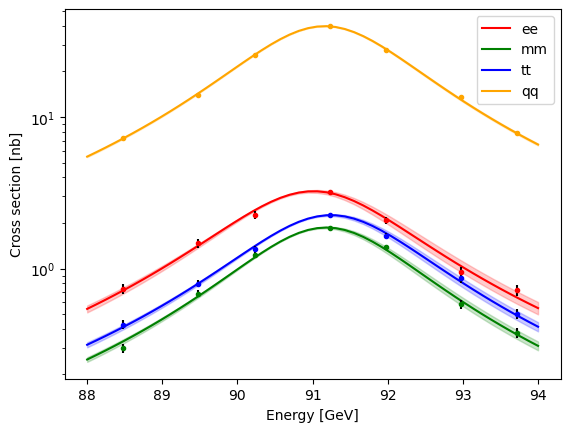

In [431]:
# 3.6.1, 3.6.2, 3.6.3
colors = ['red', 'green', 'blue', 'orange']
labels = ['ee', 'mm', 'tt', 'qq']
chi_sq = [0] * 4 
energies_plot = np.linspace(88, 94, num=50)

for i in range(4):
    popt, pcov = curve_fit(BreitWigner, energies, sigma[:,i], bounds=([0, 90, 0], [np.infty, 92, np.infty]), sigma=delta_sigma[i,:], absolute_sigma=True)
    print(f"Standard errors: {np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2])}")
    plt.fill_between(energies_plot,BreitWigner(energies_plot,popt[0]-np.sqrt(pcov[0,0]),popt[1]-np.sqrt(pcov[1,1]),popt[2]-np.sqrt(pcov[2,2])), BreitWigner(energies_plot,popt[0]+np.sqrt(pcov[0,0]),popt[1]+np.sqrt(pcov[1,1]),popt[2]+np.sqrt(pcov[2,2])), alpha=0.2,color=colors[i])
    plt.plot(energies_plot, BreitWigner(energies_plot, popt[0], popt[1], popt[2]), color = colors[i], label=labels[i])
    plt.errorbar(x=energies, y=sigma[:,i], fmt='.', elinewidth=1.5, yerr = delta_sigma[i,:], ecolor = 'black', mfc=colors[i], mec=colors[i])
    plt.xlabel("Energy [GeV]")
    plt.ylabel("Cross section [nb]")
    plt.yscale('log')
    plt.legend()
    plt.savefig("Task_3_6/cross_sections.png")
    temp=0
    for k in range(7):
        temp += (BreitWigner(energies[k],popt[0],popt[1],popt[2])-sigma[k,i])**2/delta_sigma[i,k]
    chi_sq[i]=temp/4
    print(f"Chi squared: {temp/4}")
    print(f"Parameter a,b,c: {popt}")

### Questions

1. What does the $\chi^2/\rm{NDF}$ mean?

2. What range of $\chi^2/\rm{NDF}$ denotes a good fit? What happens outside of this range?

3. How good was the fit you just got?

#1. The value chi**2/NDF measures how well a fit approximates the data. Small values of chi**2 indicate a good approximation.
#2. A fit approximates the data well, if chi**2/NDF \lesssim 1. 
#3. very good

In [441]:
decay_width = np.mean([2.68306121, 2.53459927, 2.60728131, 2.52681565])
decay_width_err = np.std([2.68306121, 2.53459927, 2.60728131, 2.52681565])

decay_width_4_neutrinos = 2.442 + 0.1659 + 0.0843
print(decay_width, decay_width_err, decay_width_4_neutrinos)

# Experiment E3: Light Neutrinos
# Answer: Each neutrino adds 0.1659 GeV to the total decay width (together with the corresponding charged lepton) of the Z0 boson
# Our measurement for the total decay width is: 2.58793936 GeV
# The neutrino does not lie in the confidence interval of our measurement

2.58793936 0.06325257011101834 2.6922
